In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/papers/maritime-incidents-ai-agents


In [4]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/papers/maritime-incidents-ai-agents/.env.example


True

In [5]:
%%time

from llm_toolkit.eval_openai import *
from tqdm.notebook import tqdm

tqdm.pandas()

data_path = os.getenv("DATA_PATH")
results_path = "paper/data/ollama_model_results_v3-RTX4090.csv"
num_ctx = os.getenv("NUM_CTX")
data_path, results_path, num_ctx

loading env vars from: /Users/inflaton/code/papers/maritime-incidents-ai-agents/.env.example
Adding /Users/inflaton/code/papers/maritime-incidents-ai-agents to sys.path
loading /Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py
CPU times: user 2.12 s, sys: 3.79 s, total: 5.9 s
Wall time: 5min 3s


('dataset/GMRID_v3.csv',
 'paper/data/ollama_model_results_v3-RTX4090.csv',
 '8192')

In [6]:
import pandas as pd
from llm_toolkit.llm_utils import *
from llm_toolkit.data_utils import *

df = pd.read_csv(results_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Columns: 148 entries, Headline_Details to qwen2.5:14b-instruct-fp16/shots-10(13.075)
dtypes: int64(3), object(145)
memory usage: 1.3+ MB


In [7]:
# df_test = pd.read_csv("dataset/GMRID_v3-test.csv")
# df["gpt-4o_label"] = df_test["gpt-4o_label"]
# df.to_csv(results_path, index=False)

In [8]:
model_orders = {
    k.replace("-coder", "").replace("-Coder", ""): v
    for k, v in model_orders.items()
    if "qwq" not in k.lower()
}
model_orders

{'qwen2.5:0.5b': 0.5,
 'qwen2.5:0.5b-instruct-fp16': 0.6,
 'llama3.2:1b': 1,
 'llama3.2:1b-instruct-fp16': 1.05,
 'meta-llama/Llama-3.2-1B-Instruct': 1.1,
 'qwen2.5:1.5b': 1.5,
 'qwen2.5:1.5b-instruct-fp16': 1.506,
 'Qwen/Qwen2.5-1.5B-Instruct': 1.51,
 'llama3.2:3b': 3,
 'llama3.2:3b-instruct-fp16': 3.05,
 'meta-llama/Llama-3.2-3B-Instruct': 3.1,
 'qwen2.5:3b': 4,
 'qwen2.5:3b-instruct-fp16': 4.06,
 'Qwen/Qwen2.5-3B-Instruct': 4.1,
 'microsoft/Phi-3.5-mini-instruct': 5,
 'mistralai/Mistral-7B-Instruct-v0.3': 10,
 'qwen2.5:7b': 12,
 'qwen2.5:7b-instruct-fp16': 12.05,
 'Qwen/Qwen2.5-7B-Instruct': 12.1,
 'llama3.1:8b': 15,
 'llama3.1:8b-instruct-fp16': 15.1,
 'meta-llama/Llama-3.1-8B_4bit': 16,
 'meta-llama/Llama-3.1-8B_4bit_H100': 17,
 'meta-llama/Meta-Llama-3.1-8B-Instruct': 20,
 'llama3.2-vision': 21,
 'llama3.2-vision:11b': 21,
 'llama3.2-vision:11b-instruct-fp16': 21.1,
 'meta-llama/Llama-3.2-11B-Vision-Instruct': 21.5,
 'qwen2.5:14b': 22,
 'qwen2.5:14b-instruct-fp16': 22.05,
 'Qwen/

In [9]:
result_columns = [
    col
    for col in df.columns.to_list()
    if col.split("/shots")[0] in model_orders.keys()
    and col not in ["qwen2.5:1.5b/shots-00(0.175)", "qwen2.5:1.5b/shots-01(0.162)"]
]
result_columns.sort()
result_columns = sorted(
    result_columns, key=lambda x: model_orders[x.split("/shots")[0]]
)
result_columns

['qwen2.5:0.5b/shots-00(0.148)',
 'qwen2.5:0.5b/shots-01(0.135)',
 'qwen2.5:0.5b/shots-02(0.139)',
 'qwen2.5:0.5b/shots-04(0.137)',
 'qwen2.5:0.5b/shots-08(0.144)',
 'qwen2.5:0.5b/shots-10(0.160)',
 'qwen2.5:0.5b-instruct-fp16/shots-00(0.161)',
 'qwen2.5:0.5b-instruct-fp16/shots-01(0.144)',
 'qwen2.5:0.5b-instruct-fp16/shots-02(0.149)',
 'qwen2.5:0.5b-instruct-fp16/shots-04(0.145)',
 'qwen2.5:0.5b-instruct-fp16/shots-08(0.149)',
 'qwen2.5:0.5b-instruct-fp16/shots-10(0.151)',
 'llama3.2:1b/shots-00(0.215)',
 'llama3.2:1b/shots-01(0.293)',
 'llama3.2:1b/shots-02(0.315)',
 'llama3.2:1b/shots-04(0.299)',
 'llama3.2:1b/shots-08(0.289)',
 'llama3.2:1b/shots-10(0.289)',
 'llama3.2:1b-instruct-fp16/shots-00(0.265)',
 'llama3.2:1b-instruct-fp16/shots-01(0.352)',
 'llama3.2:1b-instruct-fp16/shots-02(0.375)',
 'llama3.2:1b-instruct-fp16/shots-04(0.367)',
 'llama3.2:1b-instruct-fp16/shots-08(0.362)',
 'llama3.2:1b-instruct-fp16/shots-10(0.356)',
 'qwen2.5:1.5b/shots-00(0.166)',
 'qwen2.5:1.5b/shot

In [10]:
data_col_start_idx = 0
result_col_start_idx = 8

In [11]:
df_results = df[
    df.columns.to_list()[data_col_start_idx:result_col_start_idx] + result_columns
]
df = df_results

In [12]:
# df_test = pd.read_csv("dataset/GMRID_v3-test.csv")
# df["gpt-4o_label"] = df_test["gpt-4o_label"]
# df.to_csv(results_path, index=False)

In [13]:
metrics_df = get_metrics(
    df,
    result_col_start_idx - data_col_start_idx,
    mean_eval_time=True,
    label_column="gpt-4o_label",
)
metrics_df

qwen2.5:0.5b/shots-00(0.148) - metrics_raw: {'f1': 0.0, 'accuracy': 0.0}
qwen2.5:0.5b/shots-00(0.148) - metrics: {'f1': 0.42987216975528625, 'accuracy': 0.37401918047079336}
Generating prompt templates for 0 shots with Headline_Details and gpt-4o_label
qwen2.5:0.5b/shots-01(0.135) - metrics_raw: {'f1': 0.0, 'accuracy': 0.0}
qwen2.5:0.5b/shots-01(0.135) - metrics: {'f1': 0.47234513657072097, 'accuracy': 0.44027898866608545}
Generating prompt templates for 1 shots with Headline_Details and gpt-4o_label
qwen2.5:0.5b/shots-02(0.139) - metrics_raw: {'f1': 0.0, 'accuracy': 0.0}
qwen2.5:0.5b/shots-02(0.139) - metrics: {'f1': 0.45505067177609354, 'accuracy': 0.45858761987794244}
Generating prompt templates for 2 shots with Headline_Details and gpt-4o_label
qwen2.5:0.5b/shots-04(0.137) - metrics_raw: {'f1': 0.0, 'accuracy': 0.0}
qwen2.5:0.5b/shots-04(0.137) - metrics: {'f1': 0.4193805554564878, 'accuracy': 0.45422842197035745}
Generating prompt templates for 4 shots with Headline_Details and gp

model  shots  eval_time        f1  accuracy  f1_raw  \
0           qwen2.5:0.5b      0      0.148  0.429872  0.374019     0.0   
1           qwen2.5:0.5b      1      0.135  0.472345  0.440279     0.0   
2           qwen2.5:0.5b      2      0.139  0.455051  0.458588     0.0   
3           qwen2.5:0.5b      4      0.137  0.419381  0.454228     0.0   
4           qwen2.5:0.5b      8      0.144  0.475618  0.513514     0.0   
..                   ...    ...        ...       ...       ...     ...   
133  llama3.2-vision:90b      1     21.523  0.951219  0.948561     0.0   
134  llama3.2-vision:90b      2     24.723  0.951416  0.951177     0.0   
135  llama3.2-vision:90b      4     26.505  0.961292  0.961639     0.0   
136  llama3.2-vision:90b      8     28.163  0.954236  0.954664     0.0   
137  llama3.2-vision:90b     10     30.867  0.954970  0.955536     0.0   

     accuracy_raw  ratio_valid_categories  total_tokens    eval_speed  
0             0.0                0.707062       1216142   7164.059002  
1             0.0                0.877071       1344360   8681.972295  
2             0.0                0.910201       1476977   9263.935321  
3             0.0                0.900610       1685757  10727.807864  
4             0.0                0.912816       2123853  12858.743824  
..            ...                     ...           ...           ...  
133           0.0                1.000000       1353128     54.811622  
134           0.0                1.000000       1482316     52.272854  
135           0.0                1.000000       1691358     55.634516  
136           0.0                1.000000       2112255     65.388897  
137           0.0                1.000000       2395895     67.672145  

[138 rows x 10 columns]

In [14]:
models = metrics_df["model"].unique()
models

array(['qwen2.5:0.5b', 'qwen2.5:0.5b-instruct-fp16', 'llama3.2:1b',
       'llama3.2:1b-instruct-fp16', 'qwen2.5:1.5b',
       'qwen2.5:1.5b-instruct-fp16', 'llama3.2:3b',
       'llama3.2:3b-instruct-fp16', 'qwen2.5:3b',
       'qwen2.5:3b-instruct-fp16', 'qwen2.5:7b',
       'qwen2.5:7b-instruct-fp16', 'llama3.1:8b',
       'llama3.1:8b-instruct-fp16', 'llama3.2-vision:11b',
       'llama3.2-vision:11b-instruct-fp16', 'qwen2.5:14b',
       'qwen2.5:14b-instruct-fp16', 'qwen2.5:32b', 'llama3.1:70b',
       'llama3.3:70b', 'qwen2.5:72b', 'llama3.2-vision:90b'], dtype=object)

In [15]:
all_models = models.tolist()
models = [x for x in all_models if "fp16" not in x.lower()]
llama_models = [x for x in models if "llama" in x.lower()]
qwen_models = [x for x in models if "qw" in x.lower()]
llama_models, qwen_models

(['llama3.2:1b',
  'llama3.2:3b',
  'llama3.1:8b',
  'llama3.2-vision:11b',
  'llama3.1:70b',
  'llama3.3:70b',
  'llama3.2-vision:90b'],
 ['qwen2.5:0.5b',
  'qwen2.5:1.5b',
  'qwen2.5:3b',
  'qwen2.5:7b',
  'qwen2.5:14b',
  'qwen2.5:32b',
  'qwen2.5:72b'])

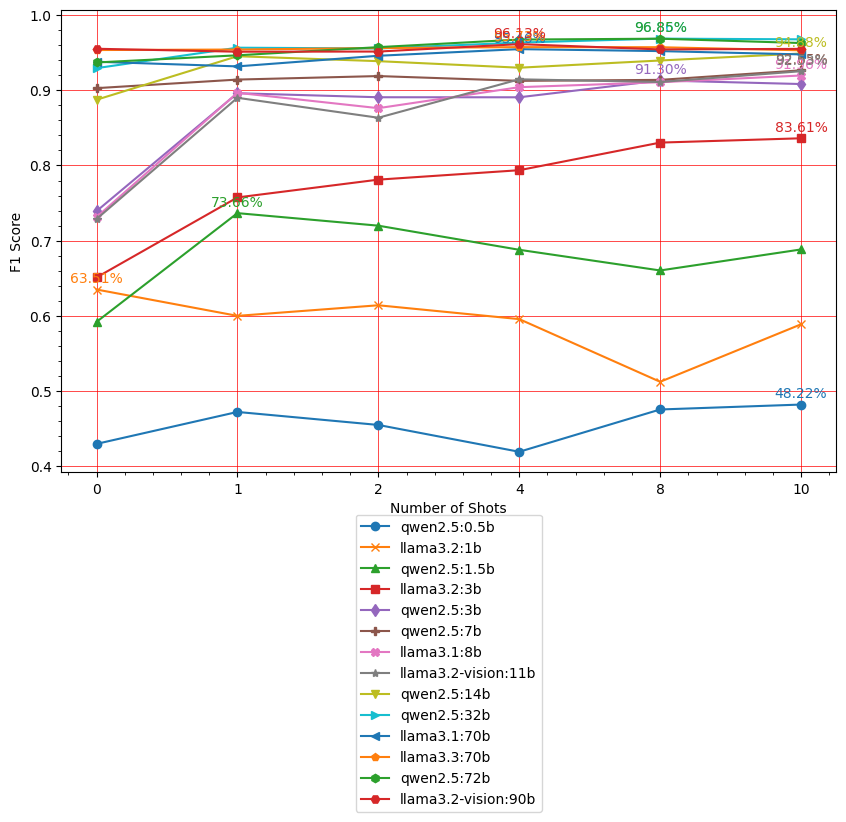

In [16]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["f1"],
    ["F1 Score"],
    bbox_to_anchor=(0.5, -0.75),
)

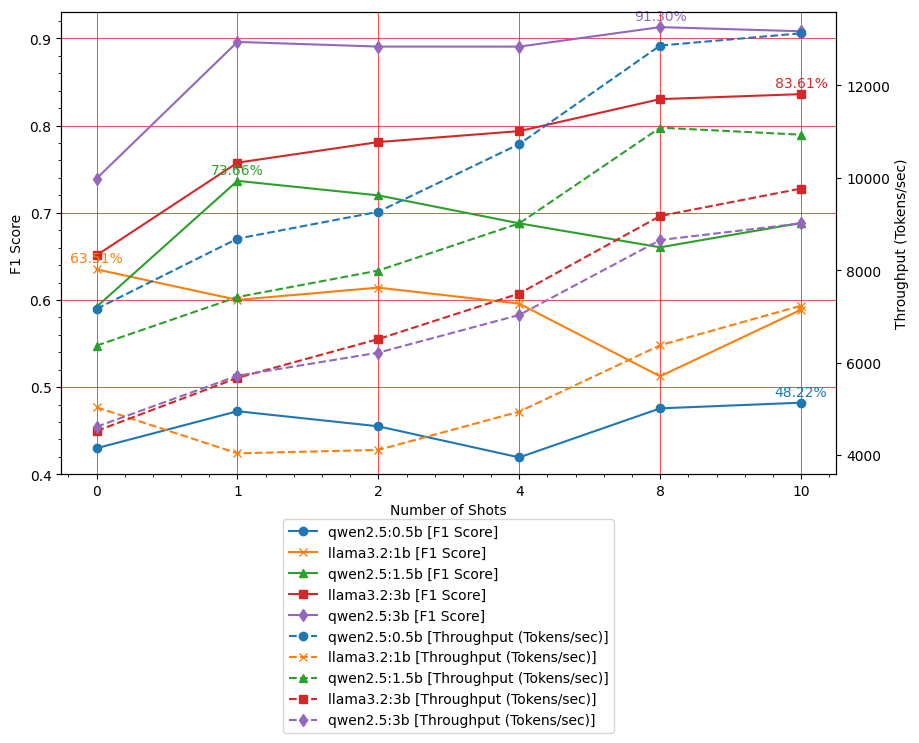

In [17]:
plot_metrics_vs_shots(
    metrics_df,
    models[:5],
    markers[:5],
    ["f1", "eval_speed"],
    ["F1 Score", "Throughput (Tokens/sec)"],
    ylimits=(0.4, 0.92),
    # log_scales=[True],
    bbox_to_anchor=(0.5, -0.575),
)

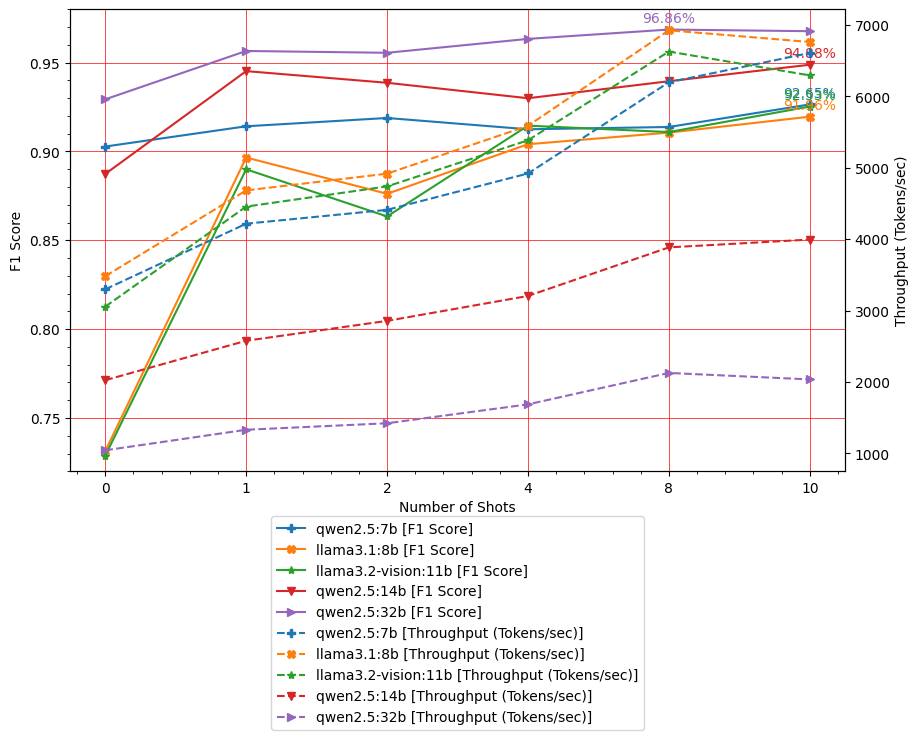

In [18]:
plot_metrics_vs_shots(
    metrics_df,
    models[5:10],
    markers[5:10],
    ["f1", "eval_speed"],
    ["F1 Score", "Throughput (Tokens/sec)"],
    ylimits=(0.72, 0.97),
    # log_scales=[False, True],
    bbox_to_anchor=(0.5, -0.575),
)

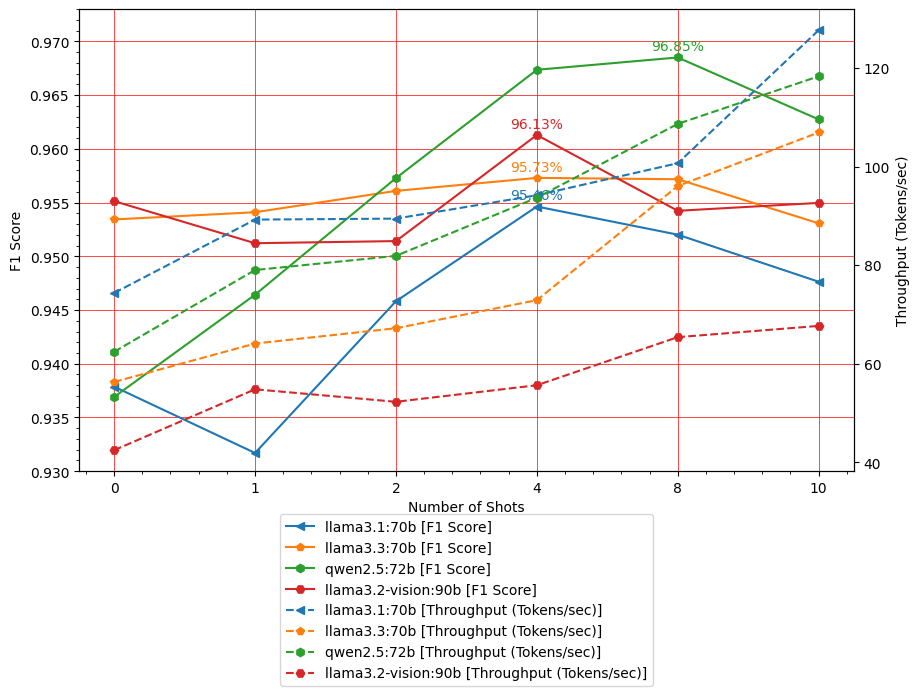

In [50]:
plot_metrics_vs_shots(
    metrics_df,
    models[10:],
    markers[10:],
    ["f1", "eval_speed"],
    ["F1 Score", "Throughput (Tokens/sec)"],
    # log_scales=[True],
    ylimits=(0.93, 0.97),
    ylimits_offset=0.003,
    bbox_to_anchor=(0.5, -0.48),
)

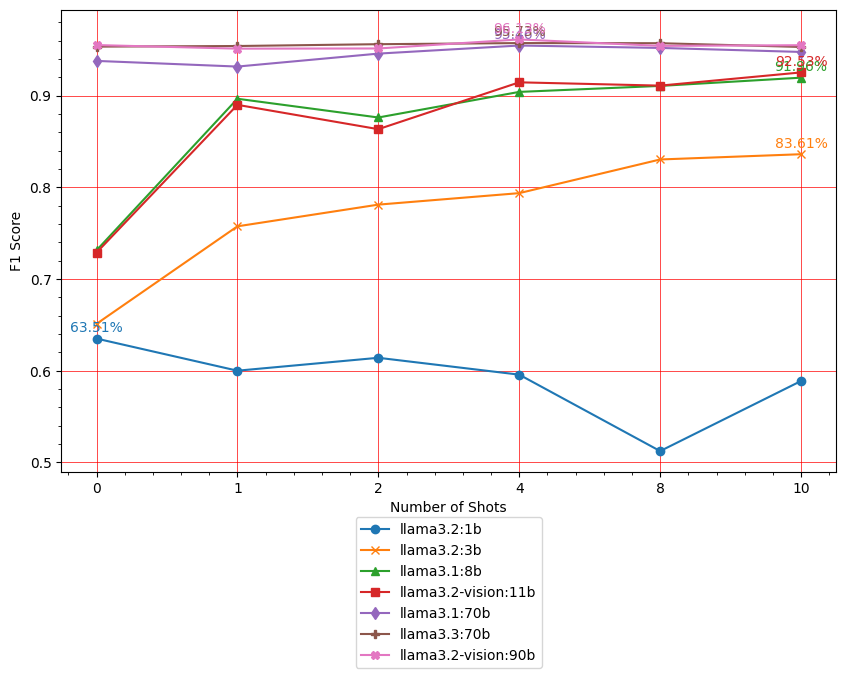

In [20]:
plot_metrics_vs_shots(
    metrics_df,
    llama_models,
    markers,
    ["f1"],
    ["F1 Score"],
    bbox_to_anchor=(0.5, -0.44),
)

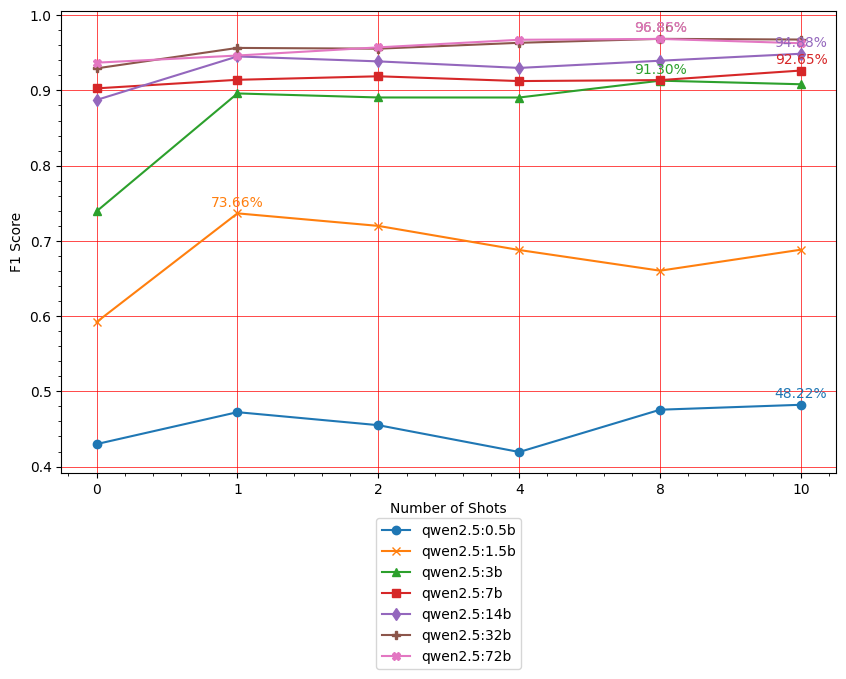

In [21]:
plot_metrics_vs_shots(
    metrics_df,
    qwen_models,
    markers,
    ["f1"],
    ["F1 Score"],
    bbox_to_anchor=(0.5, -0.44),
)

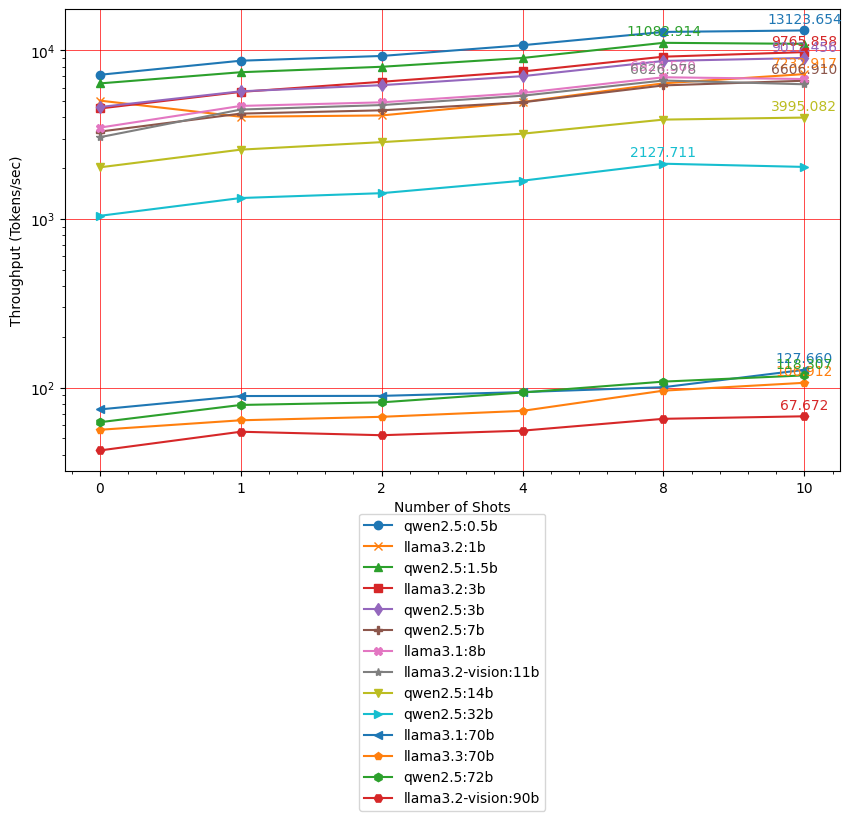

In [22]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["eval_speed"],
    ["Throughput (Tokens/sec)"],
    log_scales=[True],
    bbox_to_anchor=(0.5, -0.75),
    use_percentage=False,
)

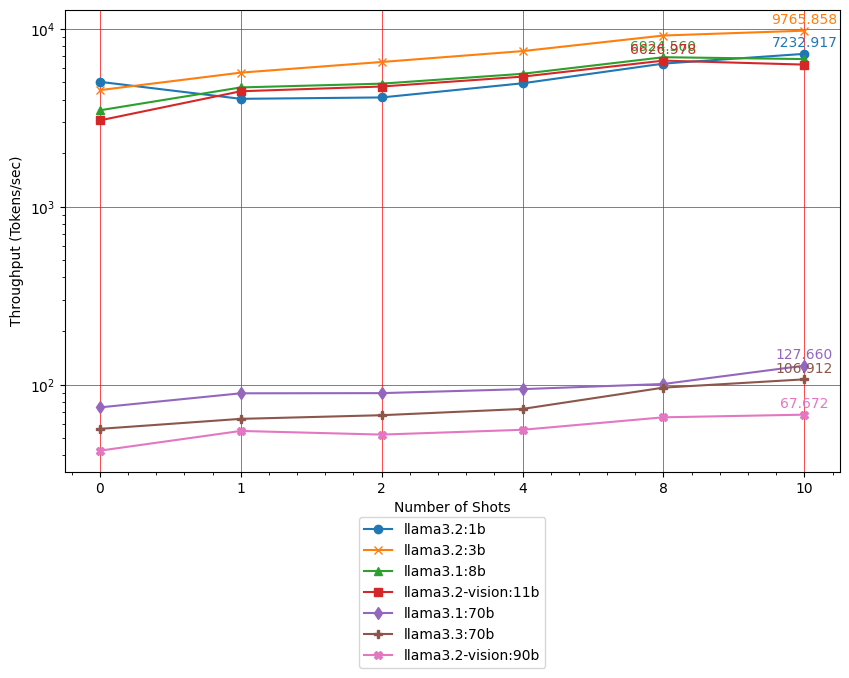

In [23]:
plot_metrics_vs_shots(
    metrics_df,
    llama_models,
    markers,
    ["eval_speed"],
    ["Throughput (Tokens/sec)"],
    log_scales=[True],
    bbox_to_anchor=(0.5, -0.44),
    use_percentage=False,
)

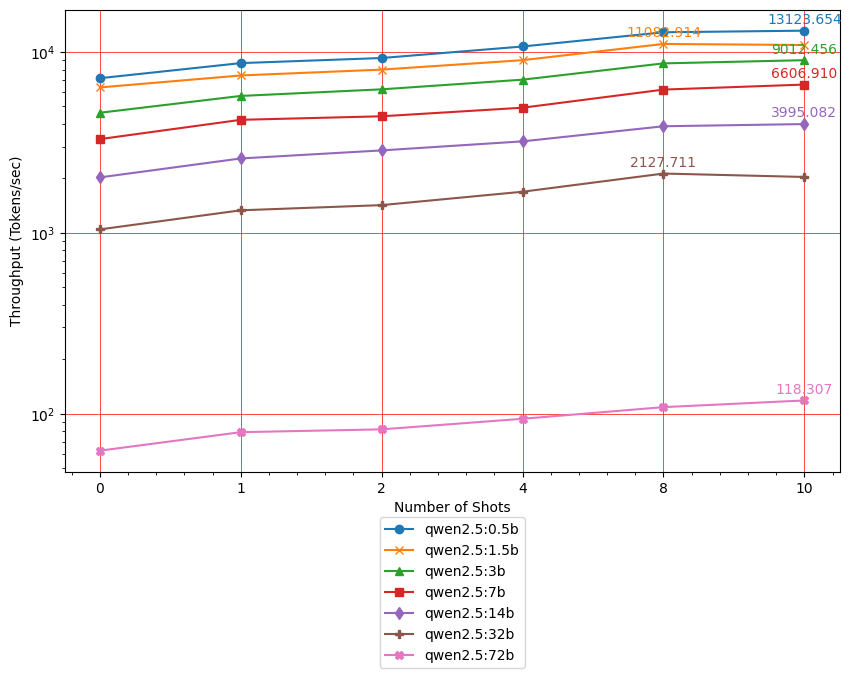

In [24]:
plot_metrics_vs_shots(
    metrics_df,
    qwen_models,
    markers,
    ["eval_speed"],
    ["Throughput (Tokens/sec)"],
    log_scales=[True],
    bbox_to_anchor=(0.5, -0.44),
    use_percentage=False,
)

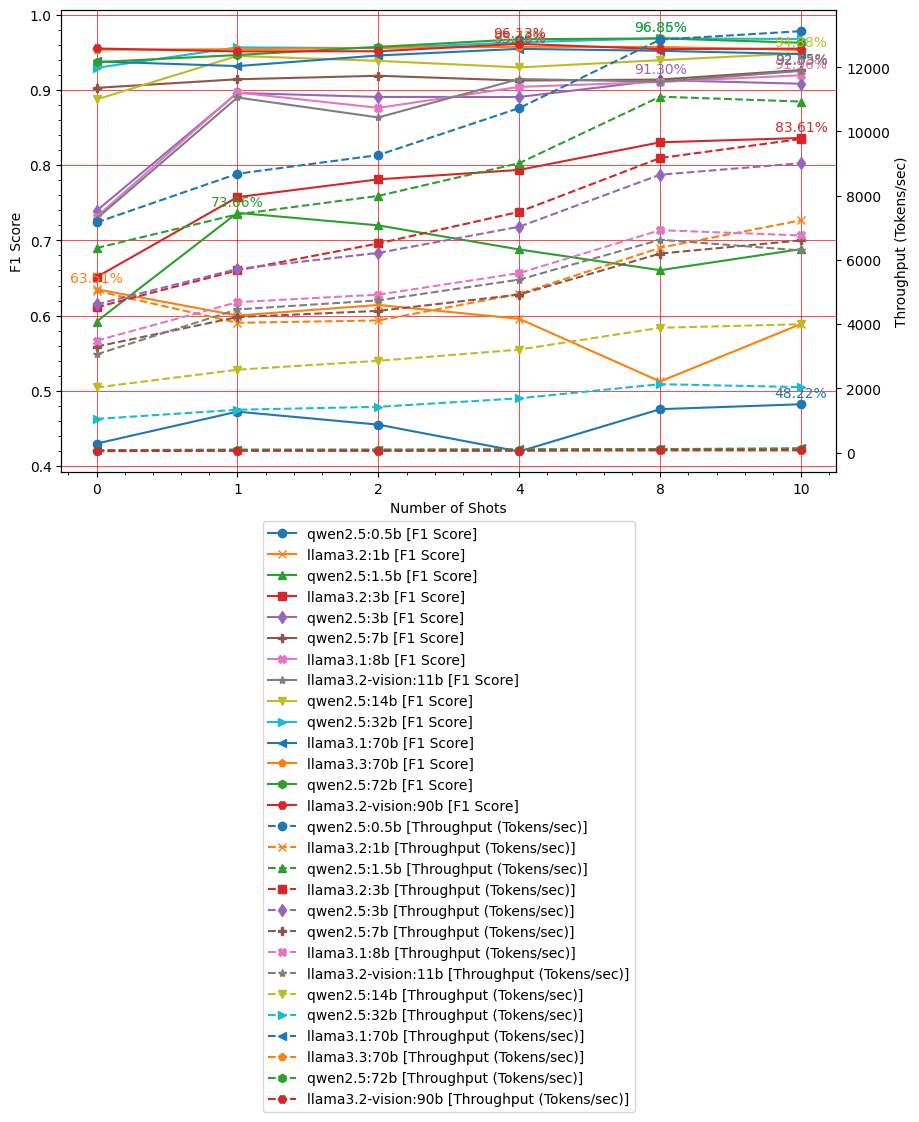

In [25]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["f1", "eval_speed"],
    ["F1 Score", "Throughput (Tokens/sec)"],
    bbox_to_anchor=(0.5, -1.4),
)

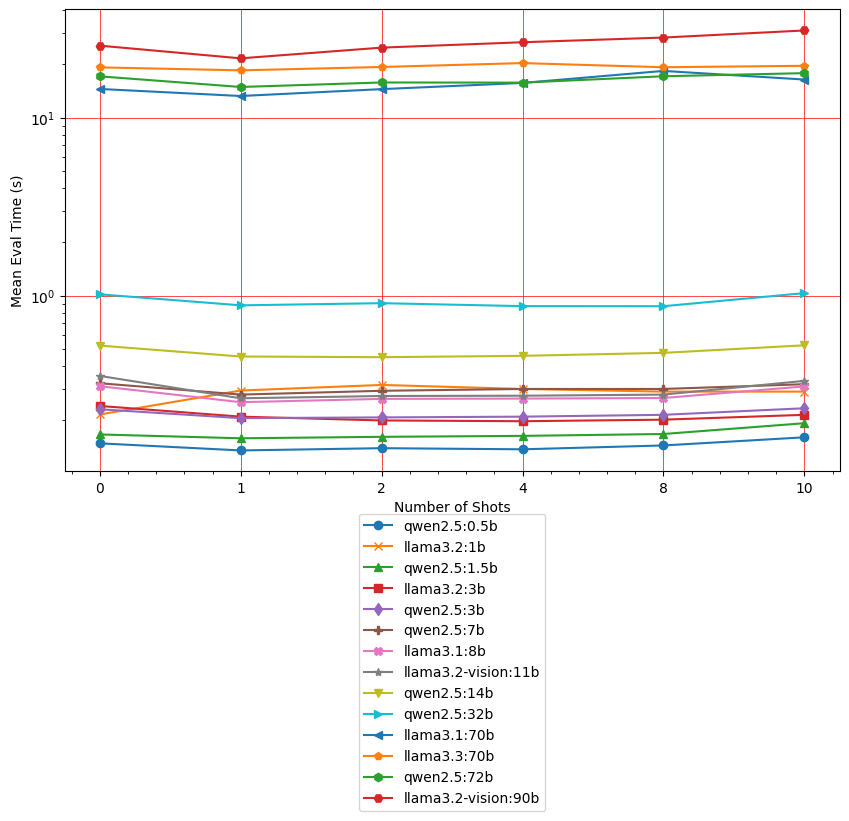

In [26]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["eval_time"],
    ["Mean Eval Time (s)"],
    log_scales=[True],
    bbox_to_anchor=(0.5, -0.75),
    use_percentage=False,
    add_values=False,
)

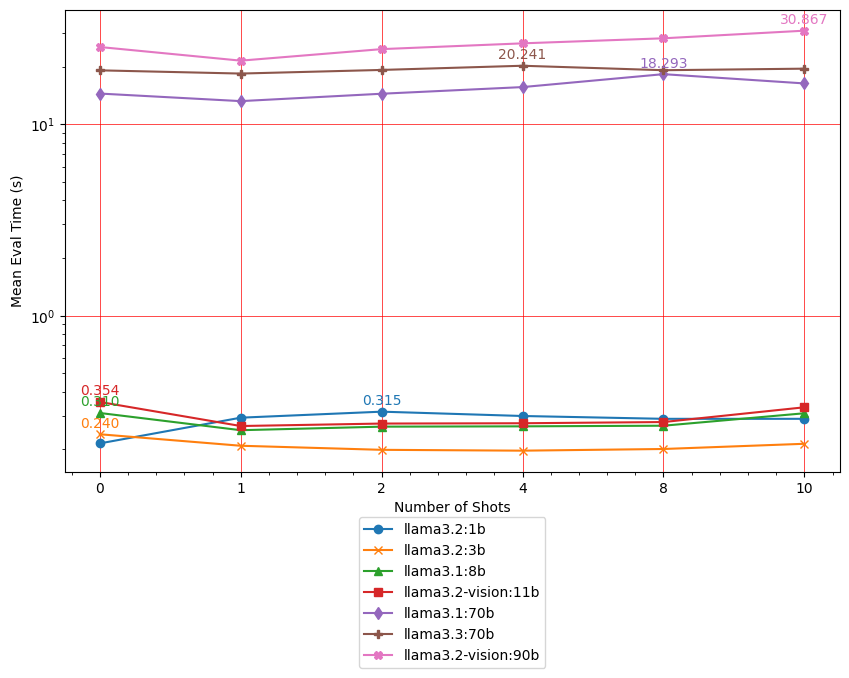

In [27]:
plot_metrics_vs_shots(
    metrics_df,
    llama_models,
    markers,
    ["eval_time"],
    ["Mean Eval Time (s)"],
    log_scales=[True],
    bbox_to_anchor=(0.5, -0.44),
    use_percentage=False,
)

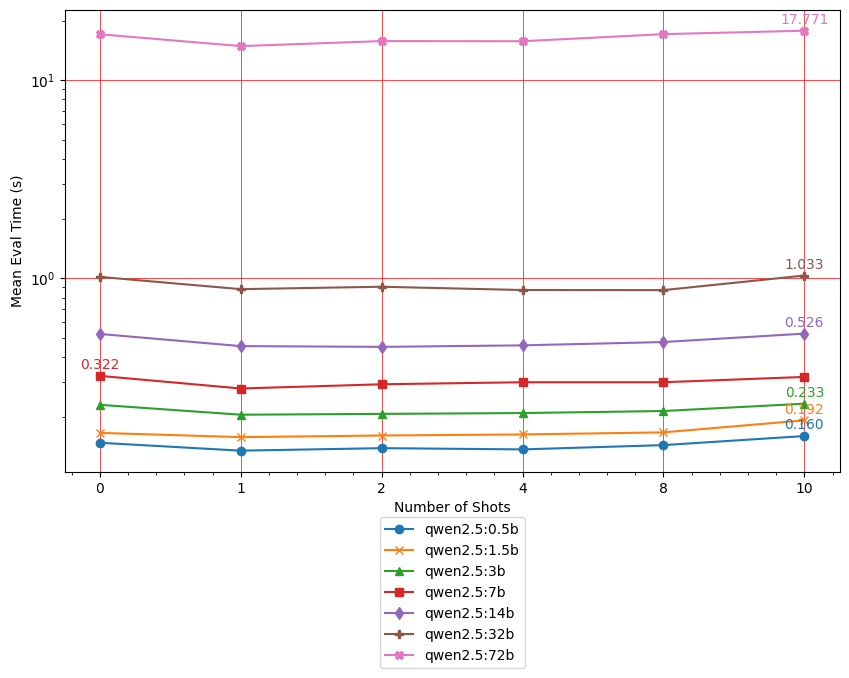

In [28]:
plot_metrics_vs_shots(
    metrics_df,
    qwen_models,
    markers,
    ["eval_time"],
    ["Mean Eval Time (s)"],
    log_scales=[True],
    bbox_to_anchor=(0.5, -0.44),
    use_percentage=False,
)

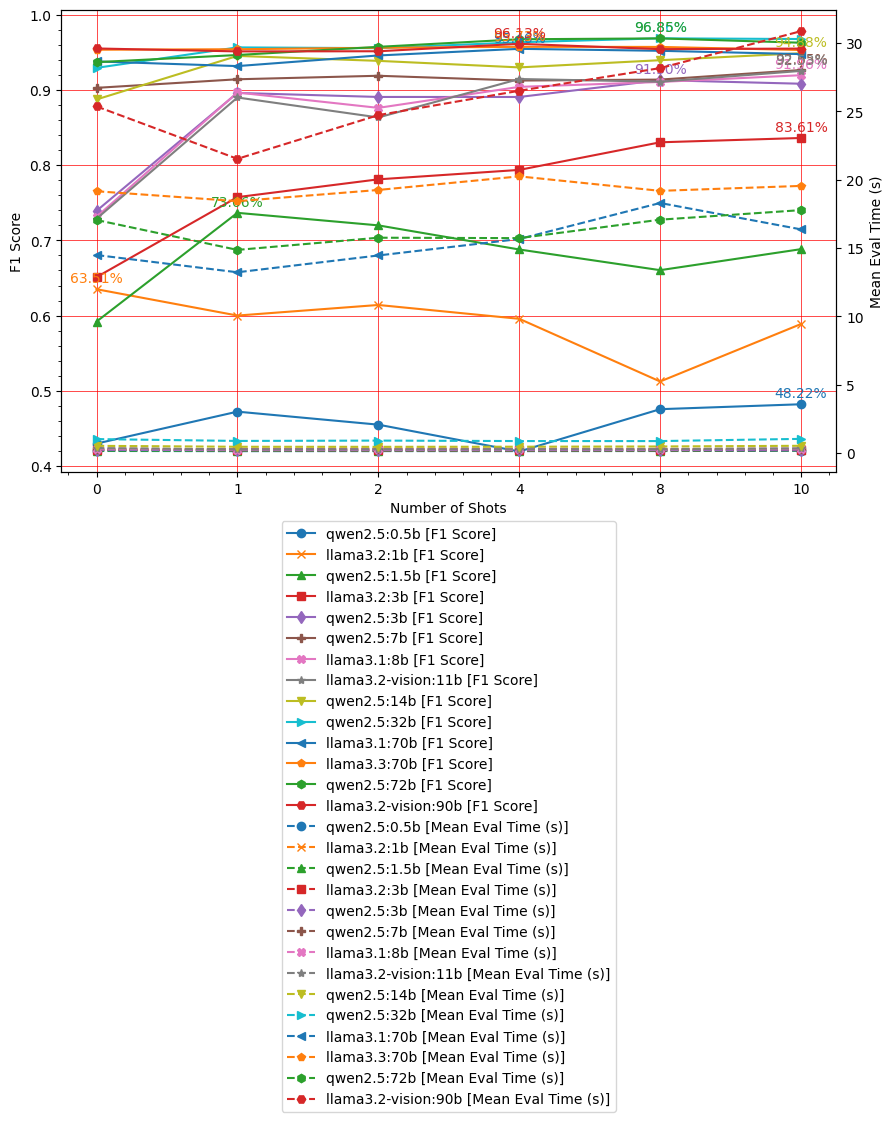

In [29]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["f1", "eval_time"],
    ["F1 Score", "Mean Eval Time (s)"],
    bbox_to_anchor=(0.5, -1.4),
)

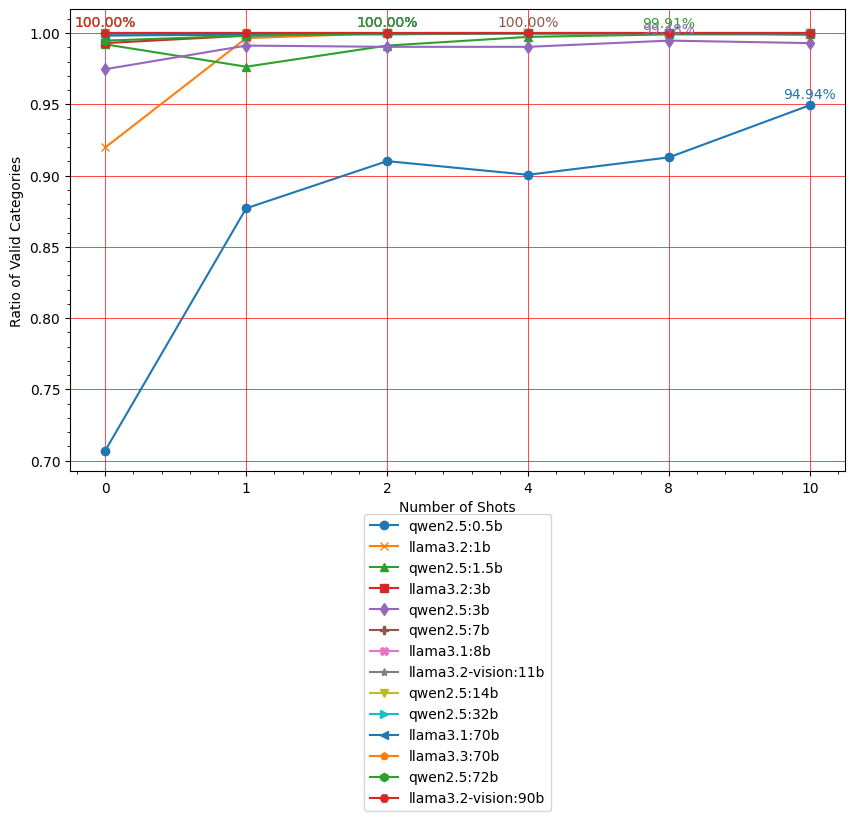

In [30]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["ratio_valid_categories"],
    ["Ratio of Valid Categories"],
    # log_scales=[True],
    bbox_to_anchor=(0.5, -0.75),
    ylimits_offset=0.002,
)

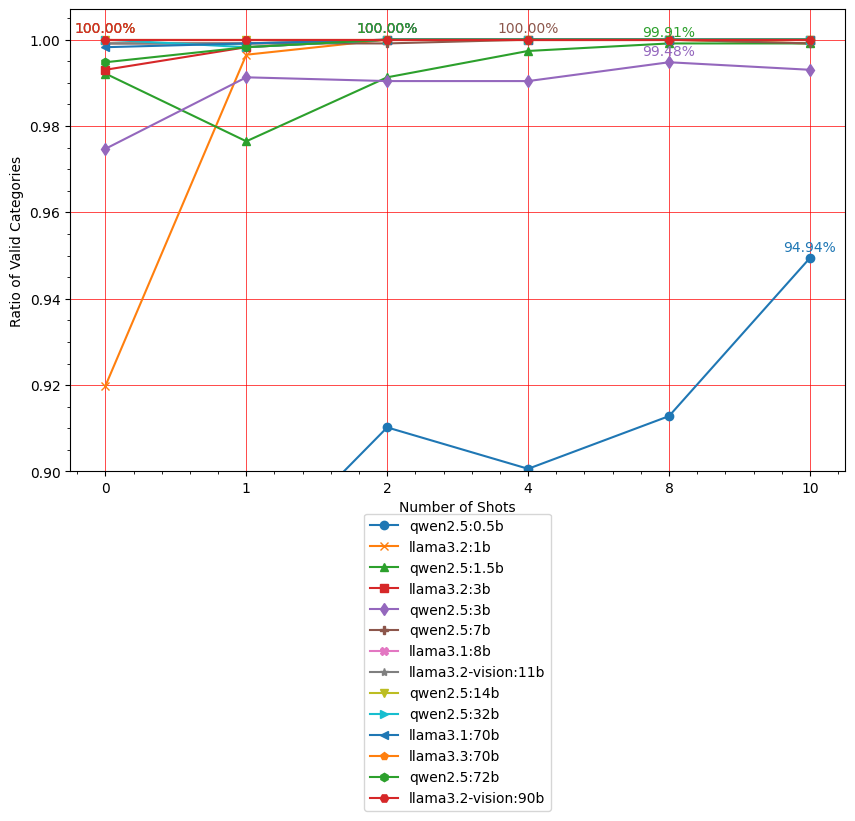

In [31]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["ratio_valid_categories"],
    ["Ratio of Valid Categories"],
    # log_scales=[True],
    bbox_to_anchor=(0.5, -0.75),
    ylimits=[0.9, 1.005],
    ylimits_offset=0.002,
)

In [32]:
top_metrics_df = get_top_metrics_df(metrics_df)
top_metrics_df

model  shots  eval_time        f1  accuracy  \
5                         qwen2.5:0.5b     10      0.160  0.482167  0.512642   
10          qwen2.5:0.5b-instruct-fp16      8      0.149  0.467142  0.482999   
12                         llama3.2:1b      0      0.215  0.635100  0.581517   
18           llama3.2:1b-instruct-fp16      0      0.265  0.635037  0.582389   
25                        qwen2.5:1.5b      1      0.158  0.736624  0.660854   
31          qwen2.5:1.5b-instruct-fp16      1      0.209  0.809998  0.766347   
41                         llama3.2:3b     10      0.214  0.836121  0.829991   
46           llama3.2:3b-instruct-fp16      8      0.326  0.822263  0.816914   
52                          qwen2.5:3b      8      0.214  0.913012  0.897995   
59            qwen2.5:3b-instruct-fp16     10      0.319  0.902539  0.887533   
65                          qwen2.5:7b     10      0.318  0.926480  0.919791   
68            qwen2.5:7b-instruct-fp16      2      0.517  0.929923  0.924150   
77                         llama3.1:8b     10      0.309  0.919572  0.918919   
83           llama3.1:8b-instruct-fp16     10      0.549  0.941467  0.940715   
89                 llama3.2-vision:11b     10      0.332  0.925294  0.925022   
95   llama3.2-vision:11b-instruct-fp16     10      4.466  0.944446  0.944202   
101                        qwen2.5:14b     10      0.526  0.948811  0.945074   
103          qwen2.5:14b-instruct-fp16      1     13.145  0.941987  0.934612   
112                        qwen2.5:32b      8      0.872  0.968602  0.967742   
117                       llama3.1:70b      4     15.657  0.954633  0.955536   
123                       llama3.3:70b      4     20.241  0.957298  0.958152   
130                        qwen2.5:72b      8     17.072  0.968506  0.965998   
135                llama3.2-vision:90b      4     26.505  0.961292  0.961639   

     f1_raw  accuracy_raw  ratio_valid_categories  total_tokens    eval_speed  
5       0.0           0.0                0.949433       2408453  13123.654098  
10      0.0           0.0                0.890148       2123961  12427.874291  
12      0.0           0.0                0.919791       1241648   5034.966850  
18      0.0           0.0                0.921534       1241394   4084.137455  
25      0.0           0.0                0.976460       1344445   7418.609912  
31      0.0           0.0                0.980820       1345192   5611.443207  
41      0.0           0.0                1.000000       2397108   9765.858110  
46      0.0           0.0                1.000000       2114116   5653.895732  
52      0.0           0.0                0.994769       2123853   8652.612667  
59      0.0           0.0                0.998256       2409169   6584.353896  
65      0.0           0.0                0.999128       2409844   6606.910014  
68      0.0           0.0                0.999128       1477035   2490.788349  
77      0.0           0.0                1.000000       2396126   6760.639123  
83      0.0           0.0                1.000000       2396309   3805.459082  
89      0.0           0.0                1.000000       2396407   6293.019506  
95      0.0           0.0                1.000000       2396331    467.804795  
101     0.0           0.0                1.000000       2410321   3995.082228  
103     0.0           0.0                1.000000       1346144     89.282740  
112     0.0           0.0                1.000000       2128102   2127.710501  
117     0.0           0.0                1.000000       1691353     94.180781  
123     0.0           0.0                1.000000       1692241     72.889812  
130     0.0           0.0                1.000000       2127607    108.653467  
135     0.0           0.0                1.000000       1691358     55.634516

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:1125: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['model'], rotation=45, ha='right')


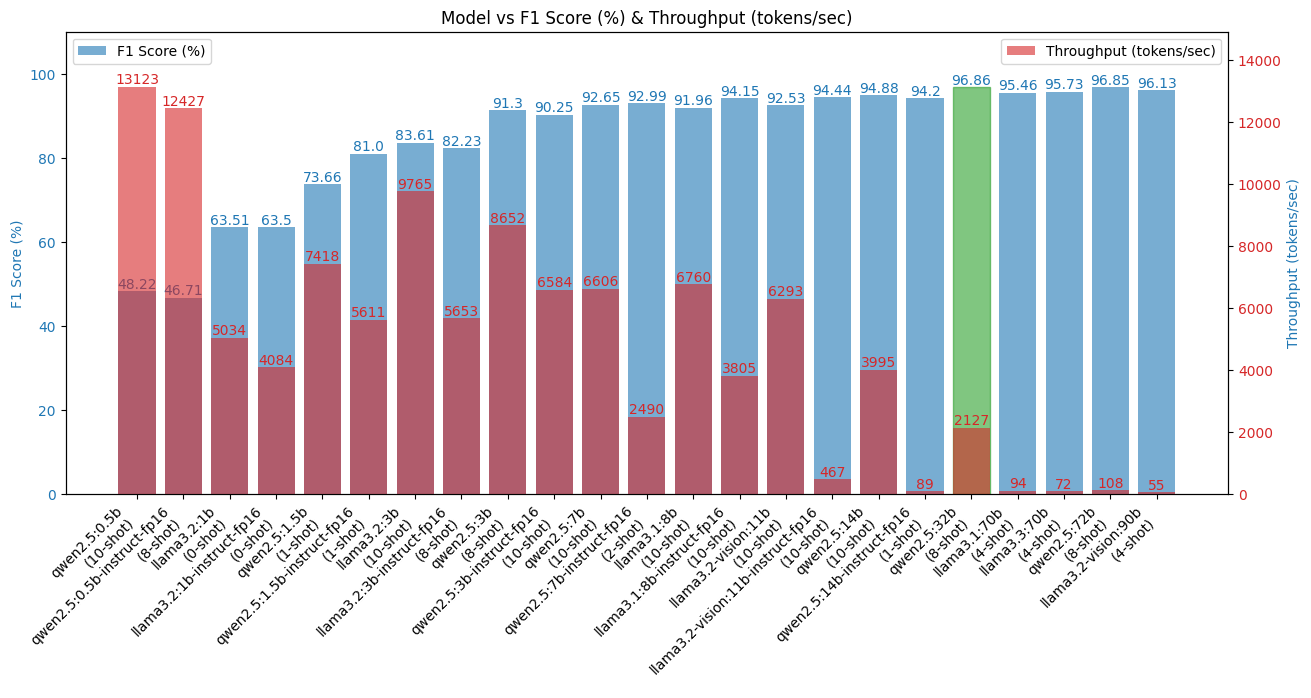

In [33]:
plot_metrics_bar_charts(top_metrics_df, second_ylim=[0, 14900])

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:1125: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['model'], rotation=45, ha='right')


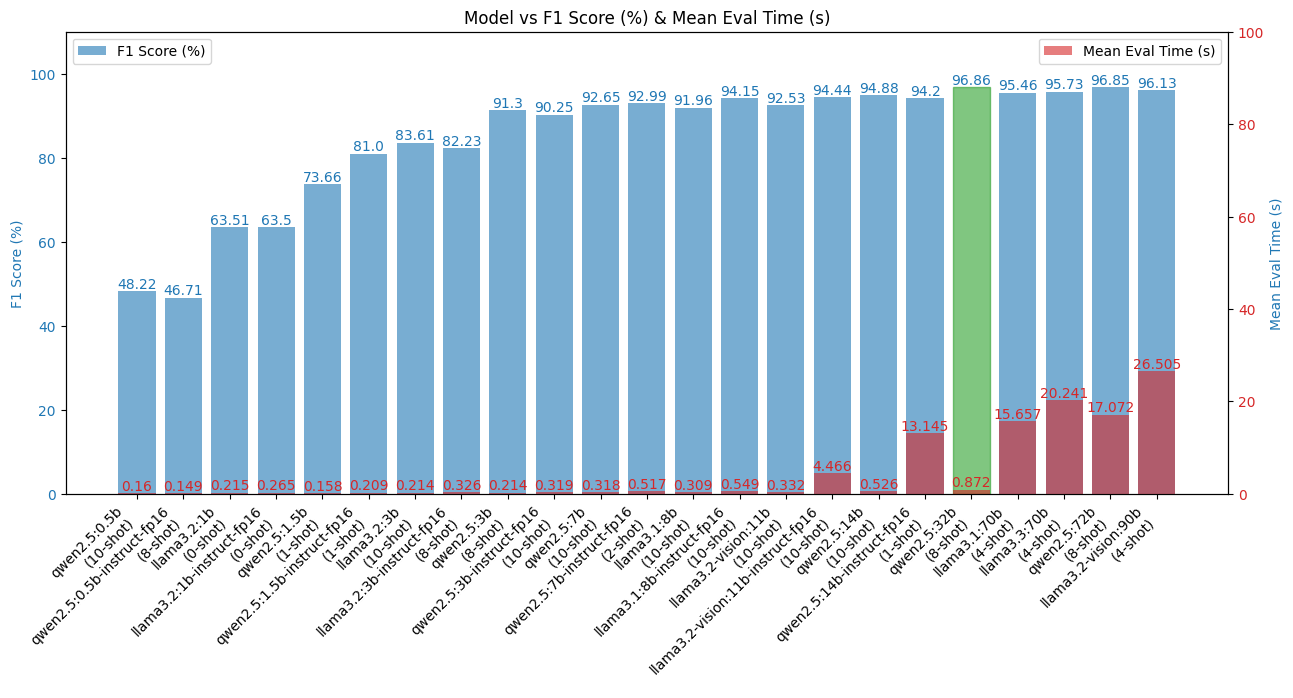

In [34]:
plot_metrics_bar_charts(
    top_metrics_df,
    second_column="eval_time",
    second_title="Mean Eval Time (s)",
    second_ylim=(0, 100),
    second_decimals=3,
)

In [35]:
ensemble_models = [
    m
    for m in all_models
    if "fp" not in m
    and top_metrics_df[top_metrics_df["model"] == m].iloc[0]["f1"] >= 0.9
]
ensemble_models

['qwen2.5:3b',
 'qwen2.5:7b',
 'llama3.1:8b',
 'llama3.2-vision:11b',
 'qwen2.5:14b',
 'qwen2.5:32b',
 'llama3.1:70b',
 'llama3.3:70b',
 'qwen2.5:72b',
 'llama3.2-vision:90b']

In [36]:
ensemble_models = ensemble_models[:5]
ensemble_models

['qwen2.5:3b',
 'qwen2.5:7b',
 'llama3.1:8b',
 'llama3.2-vision:11b',
 'qwen2.5:14b']

In [37]:
def majority_vote(v1, v2, v3):
    v1_ans, v2_ans, v3_ans = extract_answer(v1), extract_answer(v2), extract_answer(v3)
    if v2_ans == v3_ans and v3_ans != v1_ans:
        return v2

    return v1

In [38]:
import itertools

permutations = list(itertools.combinations(ensemble_models, 3))

for perm in permutations:
    print(perm)

('qwen2.5:3b', 'qwen2.5:7b', 'llama3.1:8b')
('qwen2.5:3b', 'qwen2.5:7b', 'llama3.2-vision:11b')
('qwen2.5:3b', 'qwen2.5:7b', 'qwen2.5:14b')
('qwen2.5:3b', 'llama3.1:8b', 'llama3.2-vision:11b')
('qwen2.5:3b', 'llama3.1:8b', 'qwen2.5:14b')
('qwen2.5:3b', 'llama3.2-vision:11b', 'qwen2.5:14b')
('qwen2.5:7b', 'llama3.1:8b', 'llama3.2-vision:11b')
('qwen2.5:7b', 'llama3.1:8b', 'qwen2.5:14b')
('qwen2.5:7b', 'llama3.2-vision:11b', 'qwen2.5:14b')
('llama3.1:8b', 'llama3.2-vision:11b', 'qwen2.5:14b')


In [39]:
for perm in permutations:
    print(perm)
    selected_rows = top_metrics_df[top_metrics_df["model"].isin(perm)]
    selected_rows = selected_rows.sort_values(by="f1", ascending=False)

    columns = []
    shots = 0
    eval_time = 0
    title = None
    for idx, row in selected_rows.iterrows():
        columns.append(
            f"{row['model']}/shots-{row['shots']:02d}({row['eval_time']:.3f})"
        )
        shots += row["shots"]
        eval_time += row["eval_time"]
        if title:
            title += f"_{row['model']}"
        else:
            title = row["model"]

    print(title, eval_time, columns)

    df_results[f"{title}/shots-{shots}({eval_time:.3f})"] = df_results.apply(
        lambda x: majority_vote(x[columns[0]], x[columns[1]], x[columns[2]]), axis=1
    )

('qwen2.5:3b', 'qwen2.5:7b', 'llama3.1:8b')
qwen2.5:7b_llama3.1:8b_qwen2.5:3b 0.841 ['qwen2.5:7b/shots-10(0.318)', 'llama3.1:8b/shots-10(0.309)', 'qwen2.5:3b/shots-08(0.214)']
('qwen2.5:3b', 'qwen2.5:7b', 'llama3.2-vision:11b')
qwen2.5:7b_llama3.2-vision:11b_qwen2.5:3b 0.864 ['qwen2.5:7b/shots-10(0.318)', 'llama3.2-vision:11b/shots-10(0.332)', 'qwen2.5:3b/shots-08(0.214)']
('qwen2.5:3b', 'qwen2.5:7b', 'qwen2.5:14b')
qwen2.5:14b_qwen2.5:7b_qwen2.5:3b 1.058 ['qwen2.5:14b/shots-10(0.526)', 'qwen2.5:7b/shots-10(0.318)', 'qwen2.5:3b/shots-08(0.214)']
('qwen2.5:3b', 'llama3.1:8b', 'llama3.2-vision:11b')
llama3.2-vision:11b_llama3.1:8b_qwen2.5:3b 0.855 ['llama3.2-vision:11b/shots-10(0.332)', 'llama3.1:8b/shots-10(0.309)', 'qwen2.5:3b/shots-08(0.214)']
('qwen2.5:3b', 'llama3.1:8b', 'qwen2.5:14b')
qwen2.5:14b_llama3.1:8b_qwen2.5:3b 1.049 ['qwen2.5:14b/shots-10(0.526)', 'llama3.1:8b/shots-10(0.309)', 'qwen2.5:3b/shots-08(0.214)']
('qwen2.5:3b', 'llama3.2-vision:11b', 'qwen2.5:14b')
qwen2.5:14b_l

In [40]:
ensemble_metrics_df = get_metrics(
    df_results, -len(permutations), mean_eval_time=True, label_column="gpt-4o_label"
)
ensemble_metrics_df

qwen2.5:7b_llama3.1:8b_qwen2.5:3b/shots-28(0.841) - metrics_raw: {'f1': 0.0, 'accuracy': 0.0}
qwen2.5:7b_llama3.1:8b_qwen2.5:3b/shots-28(0.841) - metrics: {'f1': 0.9413273662970569, 'accuracy': 0.937227550130776}
Generating prompt templates for 28 shots with Headline_Details and gpt-4o_label
qwen2.5:7b_llama3.2-vision:11b_qwen2.5:3b/shots-28(0.864) - metrics_raw: {'f1': 0.0, 'accuracy': 0.0}
qwen2.5:7b_llama3.2-vision:11b_qwen2.5:3b/shots-28(0.864) - metrics: {'f1': 0.9426514694130257, 'accuracy': 0.9389712292938099}
Generating prompt templates for 28 shots with Headline_Details and gpt-4o_label
qwen2.5:14b_qwen2.5:7b_qwen2.5:3b/shots-28(1.058) - metrics_raw: {'f1': 0.0, 'accuracy': 0.0}
qwen2.5:14b_qwen2.5:7b_qwen2.5:3b/shots-28(1.058) - metrics: {'f1': 0.9442353331820562, 'accuracy': 0.939843068875327}
Generating prompt templates for 28 shots with Headline_Details and gpt-4o_label
llama3.2-vision:11b_llama3.1:8b_qwen2.5:3b/shots-28(0.855) - metrics_raw: {'f1': 0.0, 'accuracy': 0.0}
l

model  shots  eval_time        f1  \
0            qwen2.5:7b_llama3.1:8b_qwen2.5:3b     28      0.841  0.941327   
1    qwen2.5:7b_llama3.2-vision:11b_qwen2.5:3b     28      0.864  0.942651   
2            qwen2.5:14b_qwen2.5:7b_qwen2.5:3b     28      1.058  0.944235   
3   llama3.2-vision:11b_llama3.1:8b_qwen2.5:3b     28      0.855  0.932660   
4           qwen2.5:14b_llama3.1:8b_qwen2.5:3b     28      1.049  0.947867   
5   qwen2.5:14b_llama3.2-vision:11b_qwen2.5:3b     28      1.072  0.946654   
6   qwen2.5:7b_llama3.2-vision:11b_llama3.1:8b     30      0.959  0.931299   
7           qwen2.5:14b_qwen2.5:7b_llama3.1:8b     30      1.153  0.946315   
8   qwen2.5:14b_qwen2.5:7b_llama3.2-vision:11b     30      1.176  0.950752   
9  qwen2.5:14b_llama3.2-vision:11b_llama3.1:8b     30      1.167  0.933694   

   accuracy  f1_raw  accuracy_raw  ratio_valid_categories  total_tokens  \
0  0.937228     0.0           0.0                0.999128       2505030   
1  0.938971     0.0           0.0                0.999128       2505053   
2  0.939843     0.0           0.0                1.000000       2505479   
3  0.931125     0.0           0.0                1.000000       2504916   
4  0.945946     0.0           0.0                1.000000       2505361   
5  0.945074     0.0           0.0                1.000000       2505446   
6  0.931125     0.0           0.0                1.000000       2505138   
7  0.944202     0.0           0.0                1.000000       2505461   
8  0.950305     0.0           0.0                1.000000       2505497   
9  0.933740     0.0           0.0                1.000000       2505486   

    eval_speed  
0  2596.889782  
1  2527.782823  
2  2064.627375  
3  2554.251365  
4  2082.242980  
5  2037.637120  
6  2277.454083  
7  1894.501361  
8  1857.475728  
9  1871.792516

In [41]:
top_performance = {row["model"]: row["f1"] for _, row in top_metrics_df.iterrows()}
top_performance

{'qwen2.5:0.5b': 0.4821673331286332,
 'qwen2.5:0.5b-instruct-fp16': 0.46714200514510845,
 'llama3.2:1b': 0.6351000130429979,
 'llama3.2:1b-instruct-fp16': 0.6350365677771576,
 'qwen2.5:1.5b': 0.7366240177902896,
 'qwen2.5:1.5b-instruct-fp16': 0.8099975553031544,
 'llama3.2:3b': 0.8361210121705911,
 'llama3.2:3b-instruct-fp16': 0.8222628761915279,
 'qwen2.5:3b': 0.9130121024532599,
 'qwen2.5:3b-instruct-fp16': 0.9025388694132519,
 'qwen2.5:7b': 0.92647992402865,
 'qwen2.5:7b-instruct-fp16': 0.9299232251052649,
 'llama3.1:8b': 0.9195723471043473,
 'llama3.1:8b-instruct-fp16': 0.9414668936152565,
 'llama3.2-vision:11b': 0.925294088529936,
 'llama3.2-vision:11b-instruct-fp16': 0.9444460669324957,
 'qwen2.5:14b': 0.9488110916199264,
 'qwen2.5:14b-instruct-fp16': 0.9419874181269471,
 'qwen2.5:32b': 0.9686016449279512,
 'llama3.1:70b': 0.9546334917482155,
 'llama3.3:70b': 0.9572978076611618,
 'qwen2.5:72b': 0.9685057142285245,
 'llama3.2-vision:90b': 0.9612915930066019}

In [42]:
indices = []
for idx, row in ensemble_metrics_df.iterrows():
    for model in top_performance.keys():
        if row["model"].startswith(model) and row["f1"] > top_performance[model]:
            indices.append(idx)
            break

ensemble_metrics_df = ensemble_metrics_df.loc[indices]
ensemble_metrics_df

model  shots  eval_time        f1  \
0           qwen2.5:7b_llama3.1:8b_qwen2.5:3b     28      0.841  0.941327   
1   qwen2.5:7b_llama3.2-vision:11b_qwen2.5:3b     28      0.864  0.942651   
3  llama3.2-vision:11b_llama3.1:8b_qwen2.5:3b     28      0.855  0.932660   
6  qwen2.5:7b_llama3.2-vision:11b_llama3.1:8b     30      0.959  0.931299   
8  qwen2.5:14b_qwen2.5:7b_llama3.2-vision:11b     30      1.176  0.950752   

   accuracy  f1_raw  accuracy_raw  ratio_valid_categories  total_tokens  \
0  0.937228     0.0           0.0                0.999128       2505030   
1  0.938971     0.0           0.0                0.999128       2505053   
3  0.931125     0.0           0.0                1.000000       2504916   
6  0.931125     0.0           0.0                1.000000       2505138   
8  0.950305     0.0           0.0                1.000000       2505497   

    eval_speed  
0  2596.889782  
1  2527.782823  
3  2554.251365  
6  2277.454083  
8  1857.475728

In [43]:
# Concatenate vertically
top_metrics_df = pd.concat([top_metrics_df, ensemble_metrics_df], axis=0).reset_index(
    drop=True
)
top_metrics_df

model  shots  eval_time        f1  \
0                                 qwen2.5:0.5b     10      0.160  0.482167   
1                   qwen2.5:0.5b-instruct-fp16      8      0.149  0.467142   
2                                  llama3.2:1b      0      0.215  0.635100   
3                    llama3.2:1b-instruct-fp16      0      0.265  0.635037   
4                                 qwen2.5:1.5b      1      0.158  0.736624   
5                   qwen2.5:1.5b-instruct-fp16      1      0.209  0.809998   
6                                  llama3.2:3b     10      0.214  0.836121   
7                    llama3.2:3b-instruct-fp16      8      0.326  0.822263   
8                                   qwen2.5:3b      8      0.214  0.913012   
9                     qwen2.5:3b-instruct-fp16     10      0.319  0.902539   
10                                  qwen2.5:7b     10      0.318  0.926480   
11                    qwen2.5:7b-instruct-fp16      2      0.517  0.929923   
12                                 llama3.1:8b     10      0.309  0.919572   
13                   llama3.1:8b-instruct-fp16     10      0.549  0.941467   
14                         llama3.2-vision:11b     10      0.332  0.925294   
15           llama3.2-vision:11b-instruct-fp16     10      4.466  0.944446   
16                                 qwen2.5:14b     10      0.526  0.948811   
17                   qwen2.5:14b-instruct-fp16      1     13.145  0.941987   
18                                 qwen2.5:32b      8      0.872  0.968602   
19                                llama3.1:70b      4     15.657  0.954633   
20                                llama3.3:70b      4     20.241  0.957298   
21                                 qwen2.5:72b      8     17.072  0.968506   
22                         llama3.2-vision:90b      4     26.505  0.961292   
23           qwen2.5:7b_llama3.1:8b_qwen2.5:3b     28      0.841  0.941327   
24   qwen2.5:7b_llama3.2-vision:11b_qwen2.5:3b     28      0.864  0.942651   
25  llama3.2-vision:11b_llama3.1:8b_qwen2.5:3b     28      0.855  0.932660   
26  qwen2.5:7b_llama3.2-vision:11b_llama3.1:8b     30      0.959  0.931299   
27  qwen2.5:14b_qwen2.5:7b_llama3.2-vision:11b     30      1.176  0.950752   

    accuracy  f1_raw  accuracy_raw  ratio_valid_categories  total_tokens  \
0   0.512642     0.0           0.0                0.949433       2408453   
1   0.482999     0.0           0.0                0.890148       2123961   
2   0.581517     0.0           0.0                0.919791       1241648   
3   0.582389     0.0           0.0                0.921534       1241394   
4   0.660854     0.0           0.0                0.976460       1344445   
5   0.766347     0.0           0.0                0.980820       1345192   
6   0.829991     0.0           0.0                1.000000       2397108   
7   0.816914     0.0           0.0                1.000000       2114116   
8   0.897995     0.0           0.0                0.994769       2123853   
9   0.887533     0.0           0.0                0.998256       2409169   
10  0.919791     0.0           0.0                0.999128       2409844   
11  0.924150     0.0           0.0                0.999128       1477035   
12  0.918919     0.0           0.0                1.000000       2396126   
13  0.940715     0.0           0.0                1.000000       2396309   
14  0.925022     0.0           0.0                1.000000       2396407   
15  0.944202     0.0           0.0                1.000000       2396331   
16  0.945074     0.0           0.0                1.000000       2410321   
17  0.934612     0.0           0.0                1.000000       1346144   
18  0.967742     0.0           0.0                1.000000       2128102   
19  0.955536     0.0           0.0                1.000000       1691353   
20  0.958152     0.0           0.0                1.000000       1692241   
21  0.965998     0.0           0.0                1.000000       2127607   
22  0.961639     0.0          

In [44]:
best_top_metrics_df = top_metrics_df[top_metrics_df["f1"] >= 0.9]

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:1125: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['model'], rotation=45, ha='right')


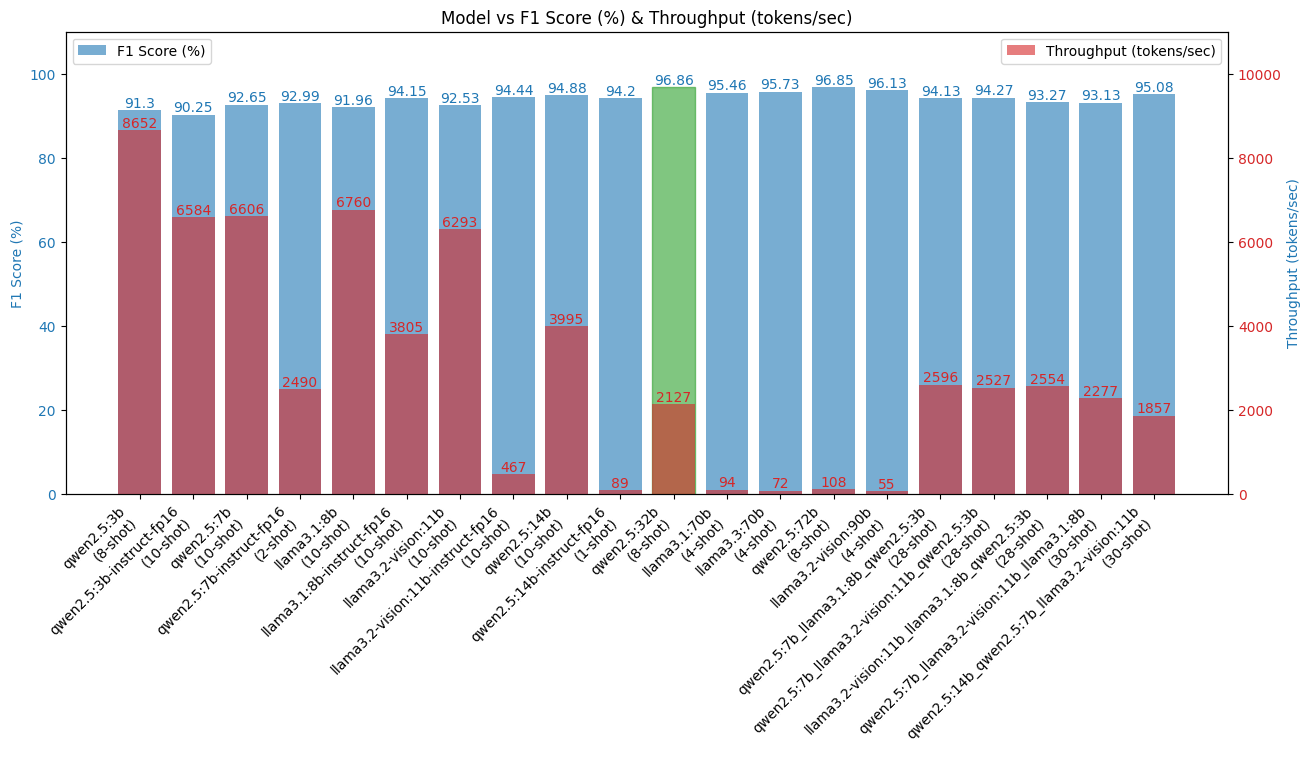

In [45]:
plot_metrics_bar_charts(best_top_metrics_df, second_ylim=[0, 11000])

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:1125: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['model'], rotation=45, ha='right')


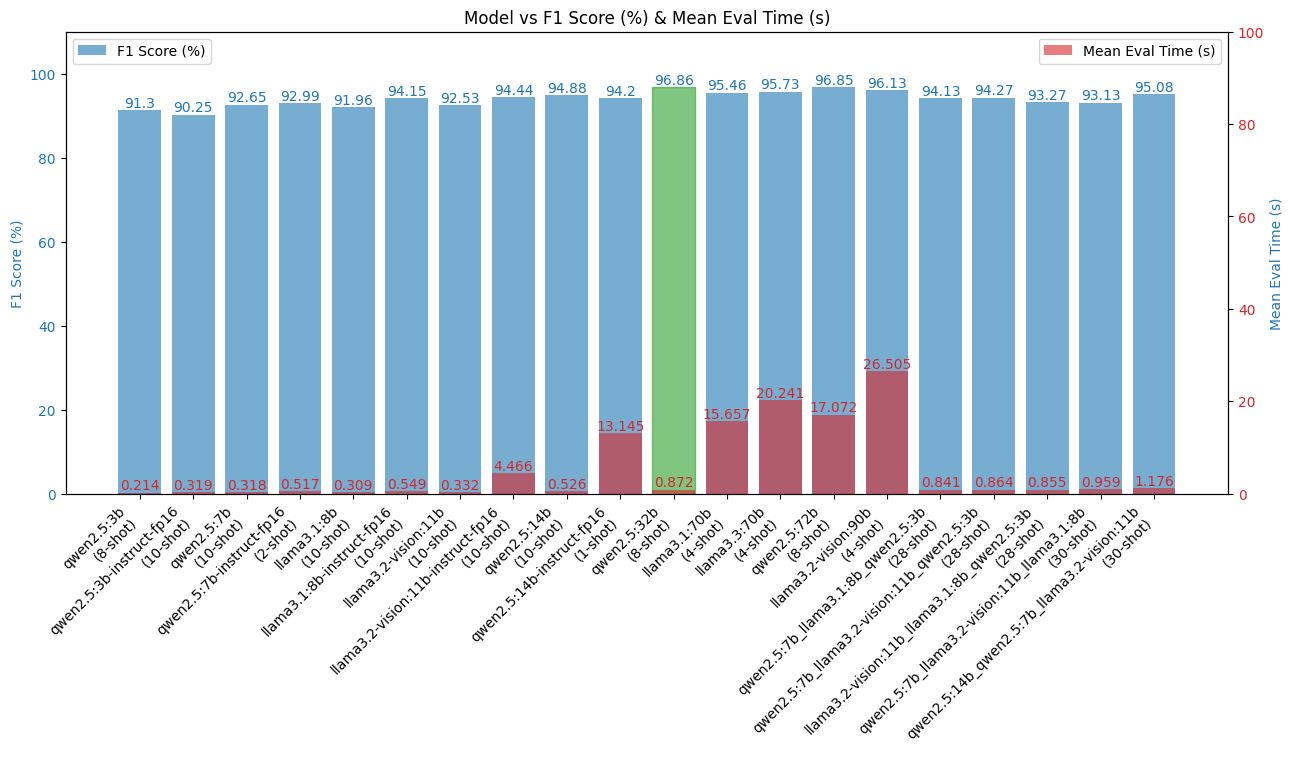

In [46]:
plot_metrics_bar_charts(
    best_top_metrics_df,
    second_column="eval_time",
    second_title="Mean Eval Time (s)",
    second_ylim=(0, 100),
    second_decimals=3,
)

In [47]:
top_metrics_df.describe()

shots  eval_time         f1   accuracy  f1_raw  accuracy_raw  \
count  28.000000  28.000000  28.000000  28.000000    28.0          28.0   
mean   10.392857   3.836893   0.865250   0.856053     0.0           0.0   
std     9.433350   7.293497   0.142937   0.148395     0.0           0.0   
min     0.000000   0.149000   0.467142   0.482999     0.0           0.0   
25%     4.000000   0.252500   0.832656   0.826722     0.0           0.0   
50%     9.000000   0.521500   0.930611   0.928073     0.0           0.0   
75%    10.000000   1.013250   0.945537   0.944420     0.0           0.0   
max    30.000000  26.505000   0.968602   0.967742     0.0           0.0   

       ratio_valid_categories  total_tokens    eval_speed  
count               28.000000  2.800000e+01     28.000000  
mean                 0.986704  2.065505e+06   4397.832676  
std                  0.029326  4.588182e+05   3640.995705  
min                  0.890148  1.241394e+06     55.634516  
25%                  0.997384  1.691357e+06   2060.151808  
50%                  1.000000  2.262114e+06   3900.270655  
75%                  1.000000  2.409338e+06   6589.992925  
max                  1.000000  2.505497e+06  13123.654098

In [48]:
metrics_df.to_csv(results_path.replace(".csv", "_metrics.csv"), index=False)
top_metrics_df.to_csv(results_path.replace(".csv", "_top_metrics.csv"), index=False)

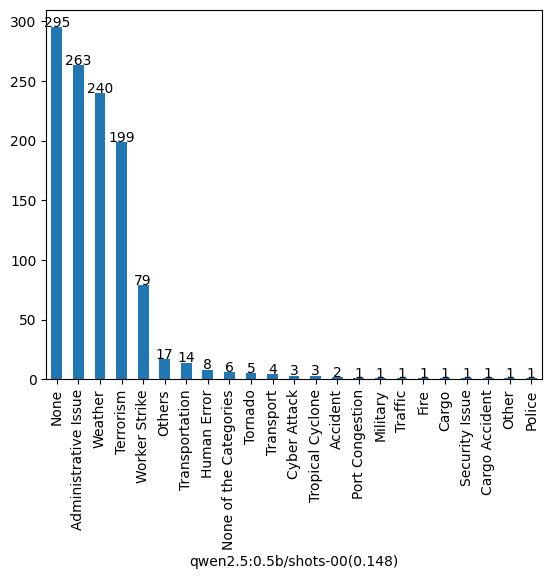

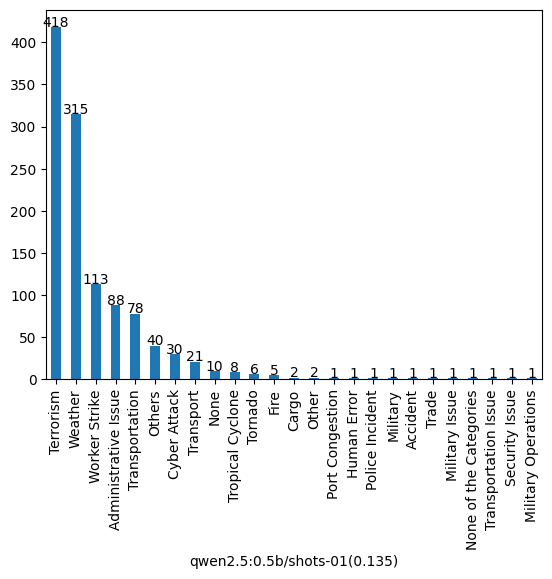

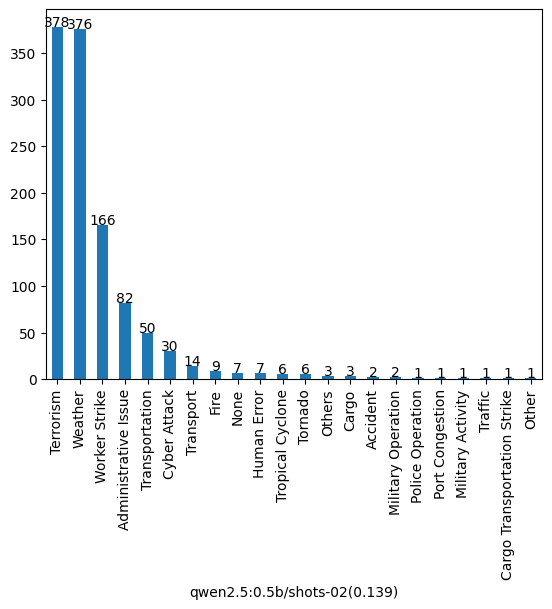

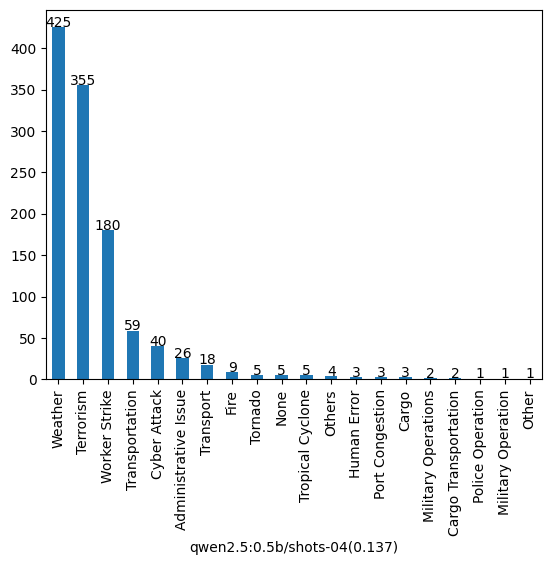

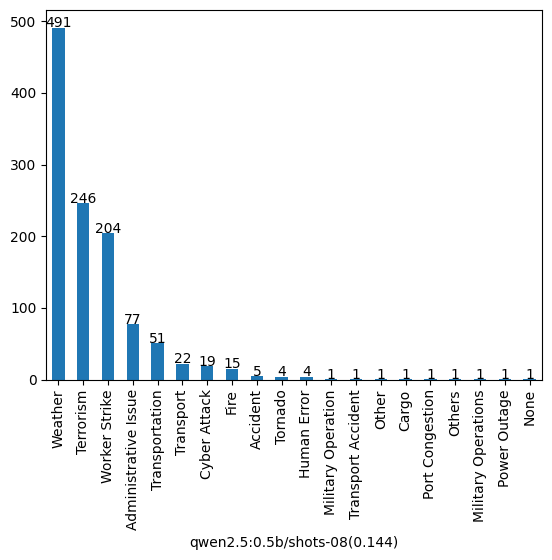

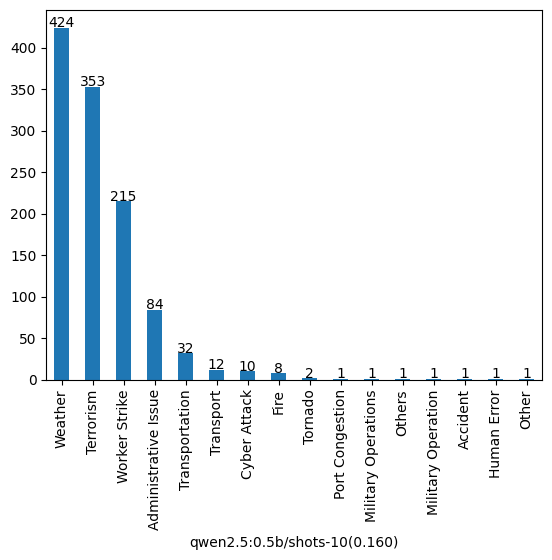

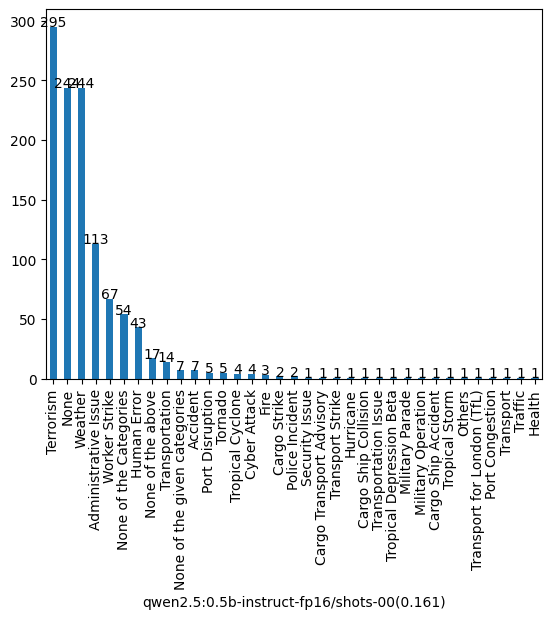

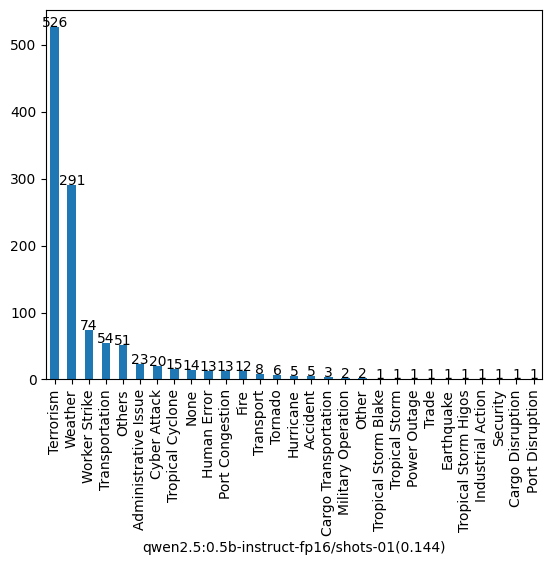

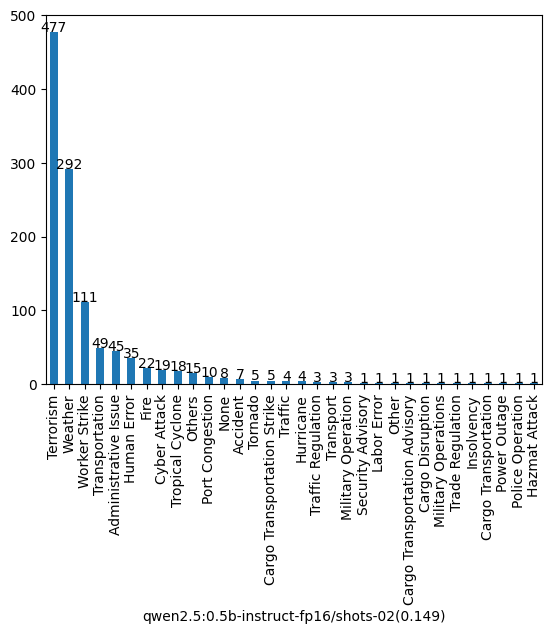

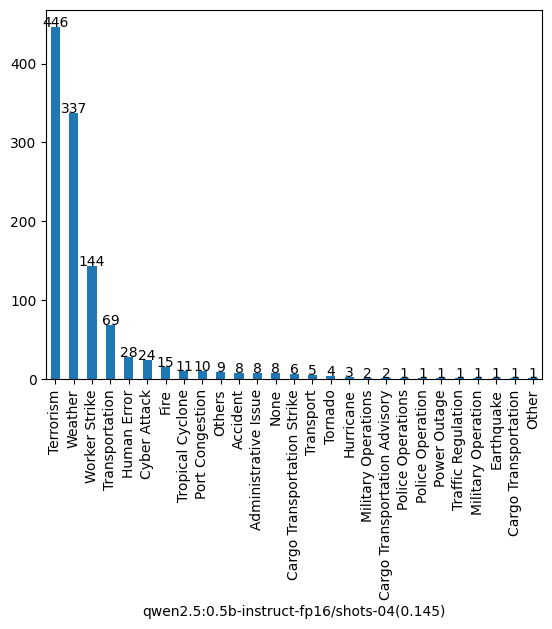

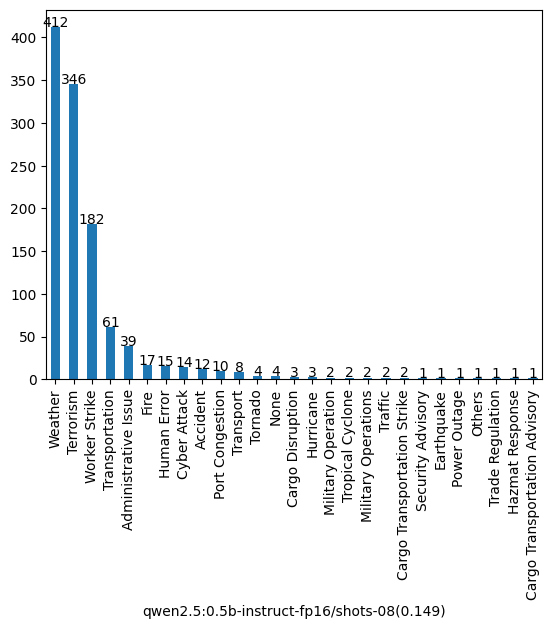

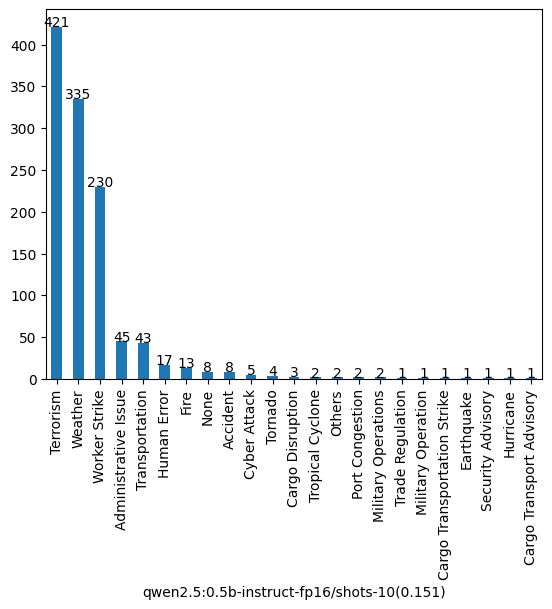

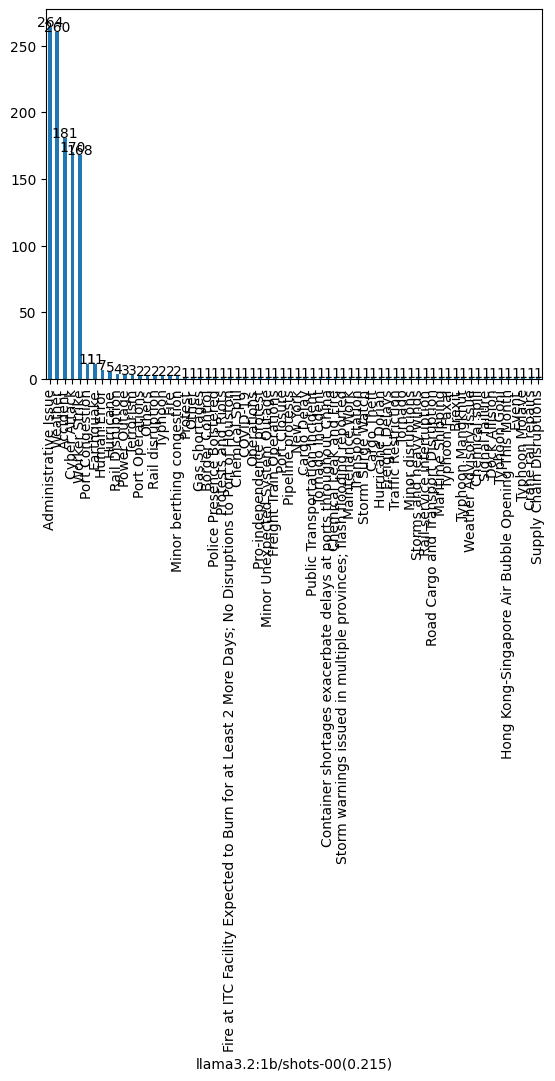

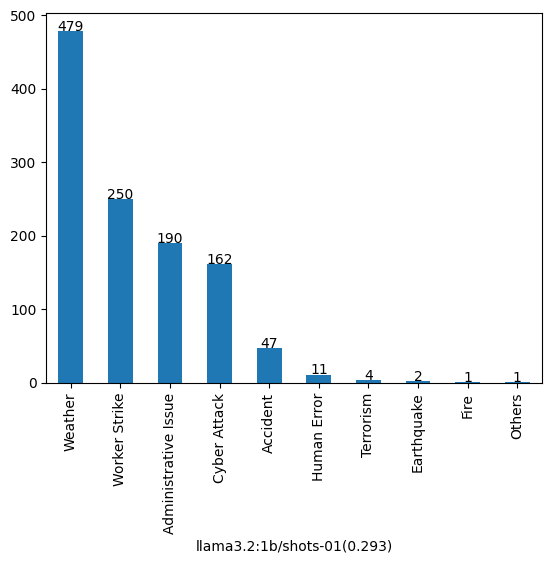

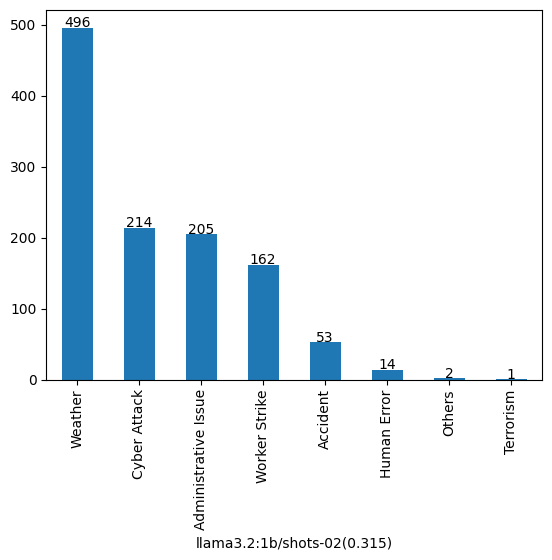

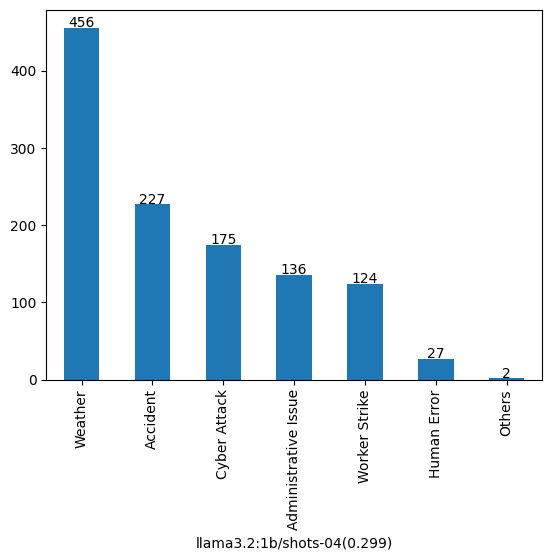

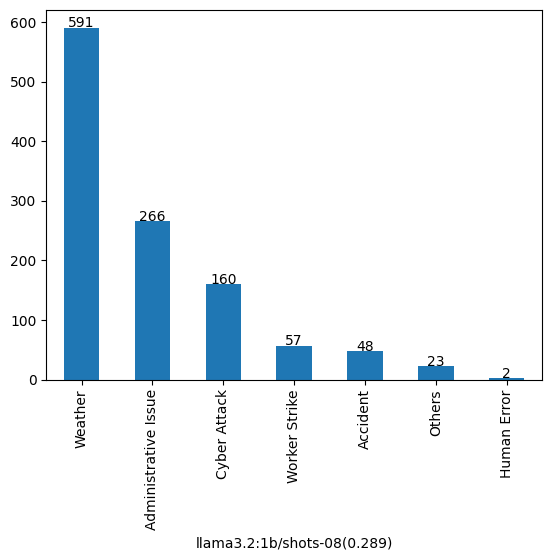

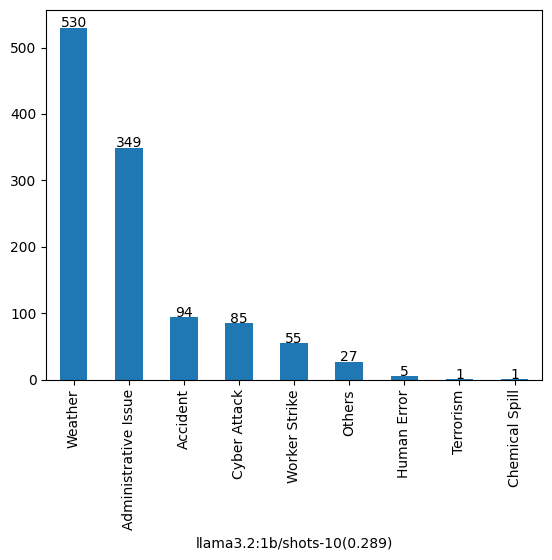

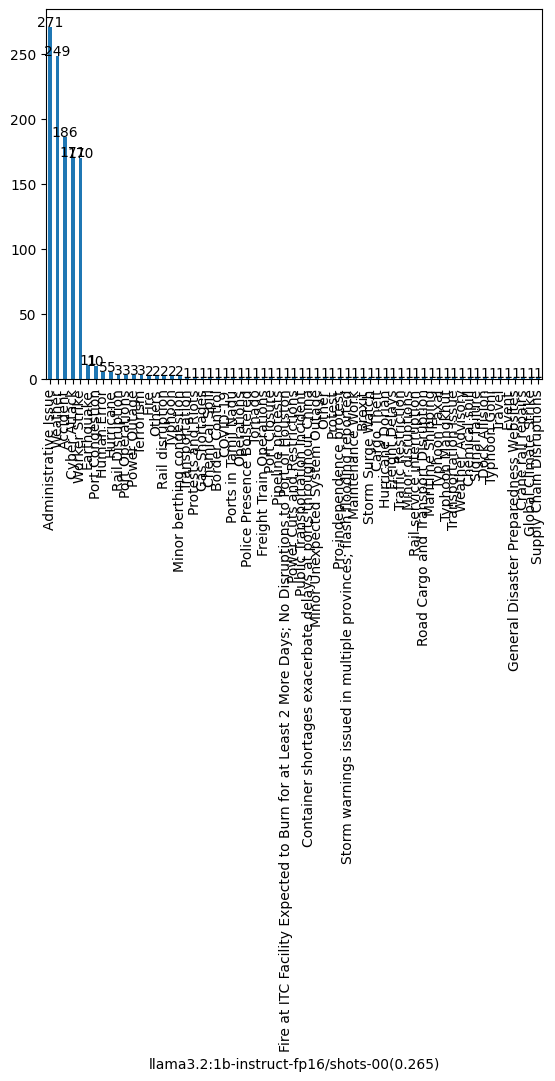

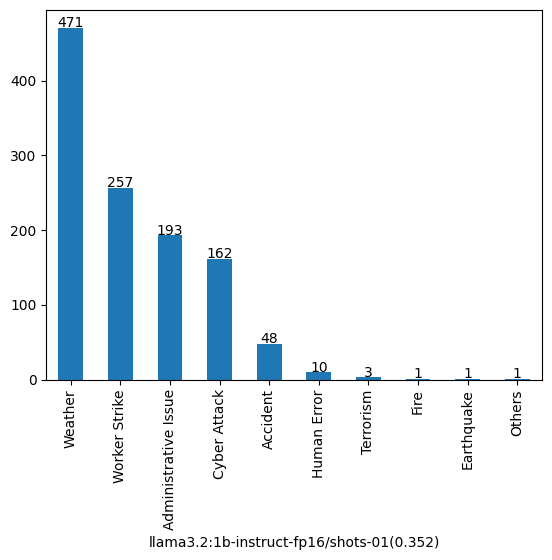

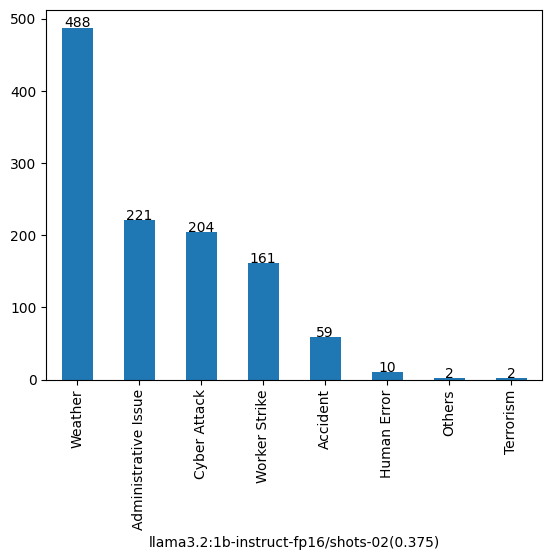

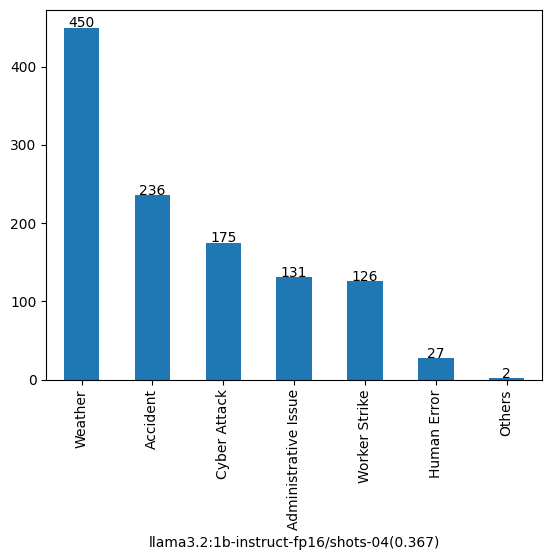

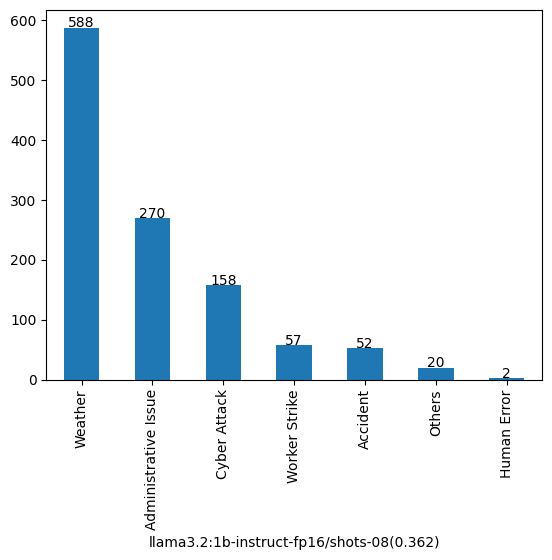

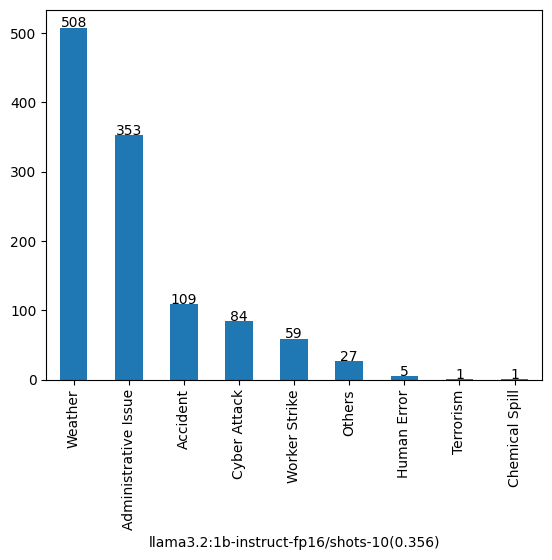

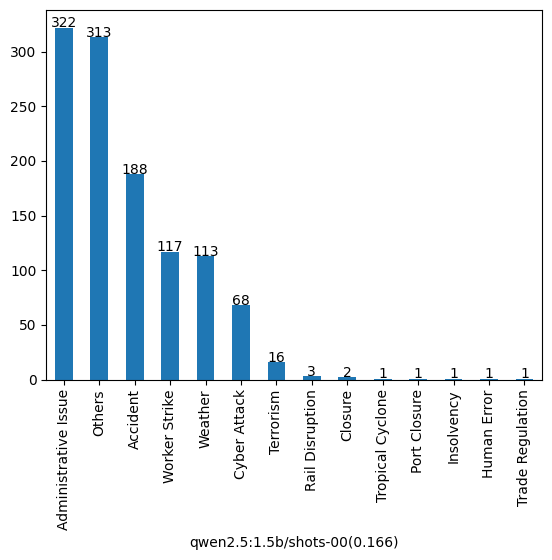

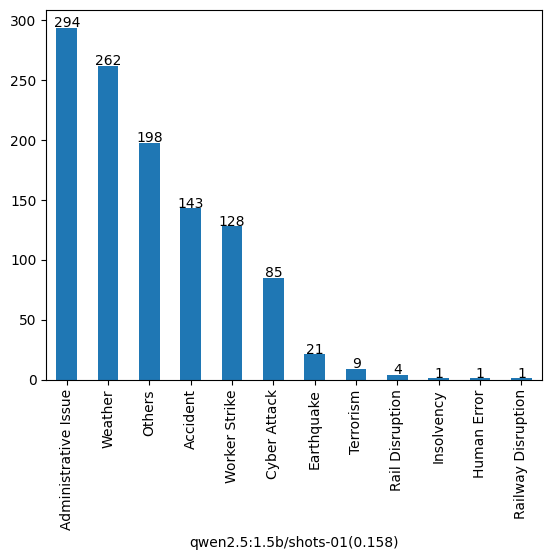

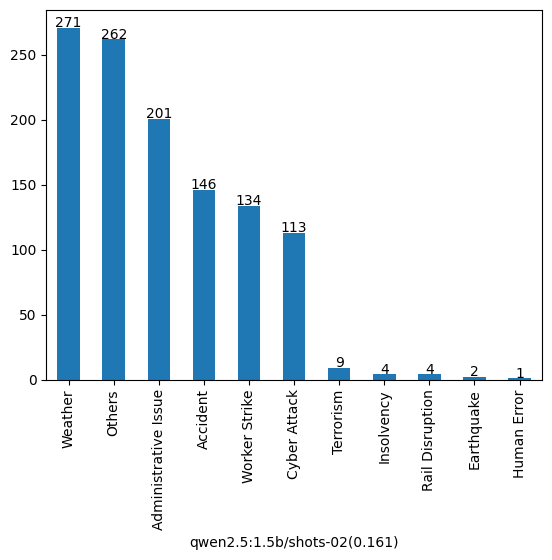

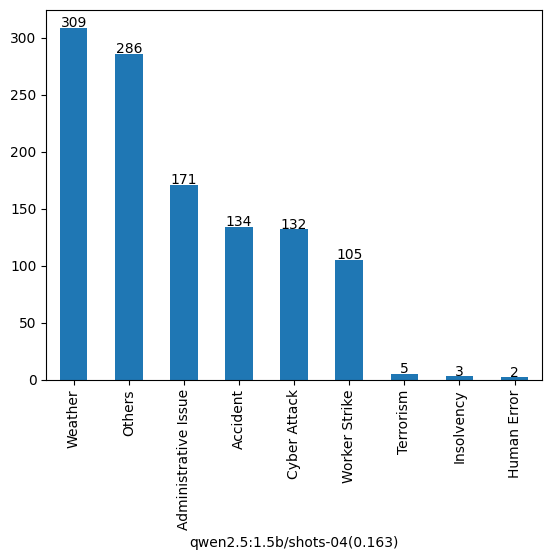

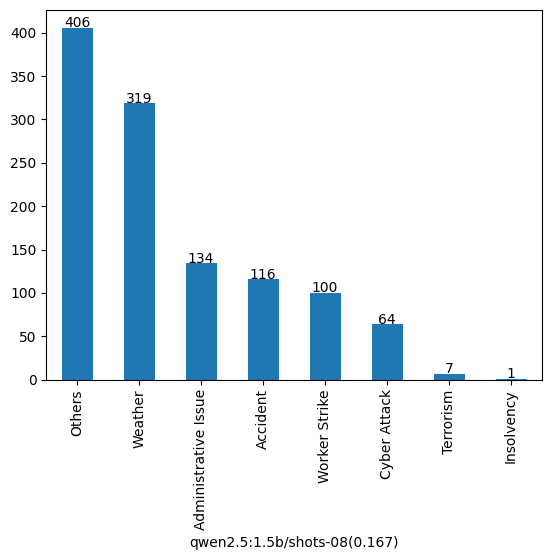

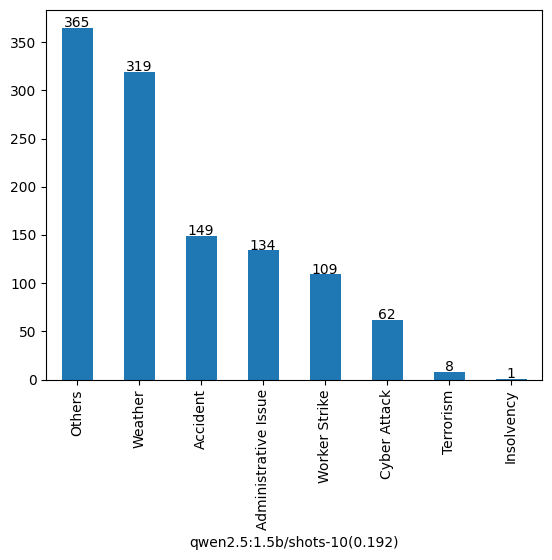

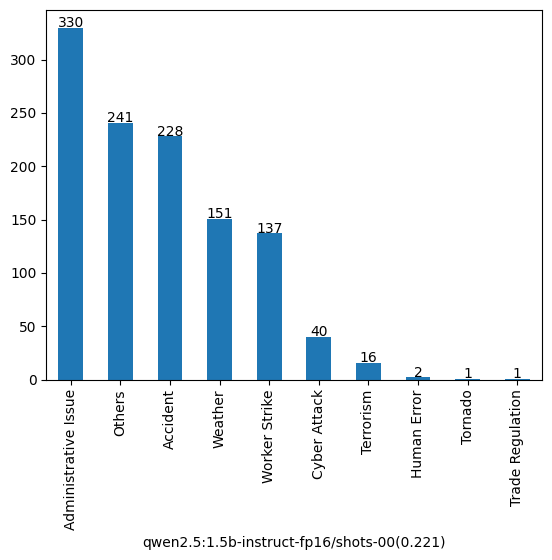

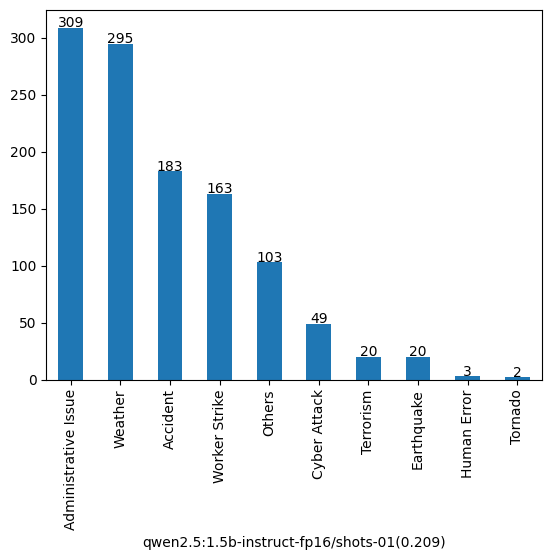

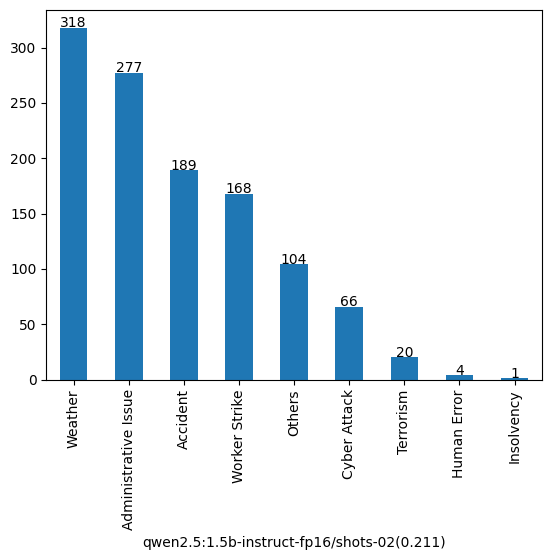

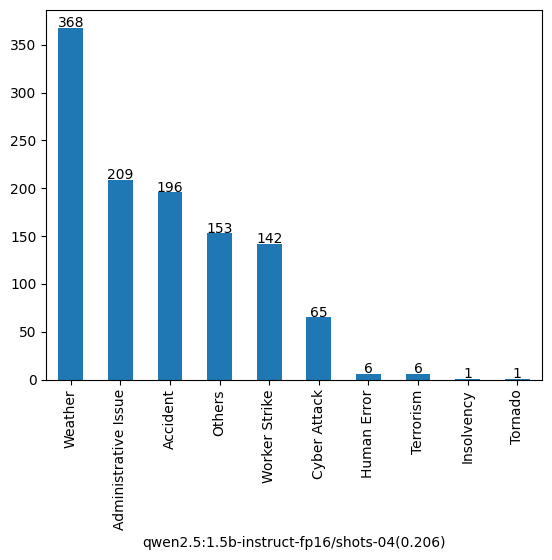

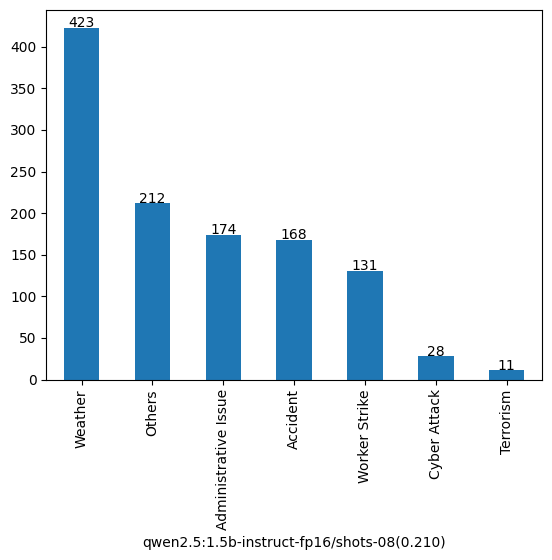

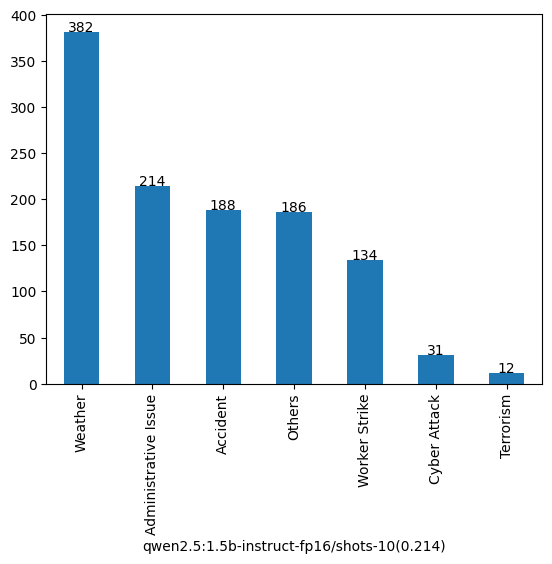

category not in json: {}


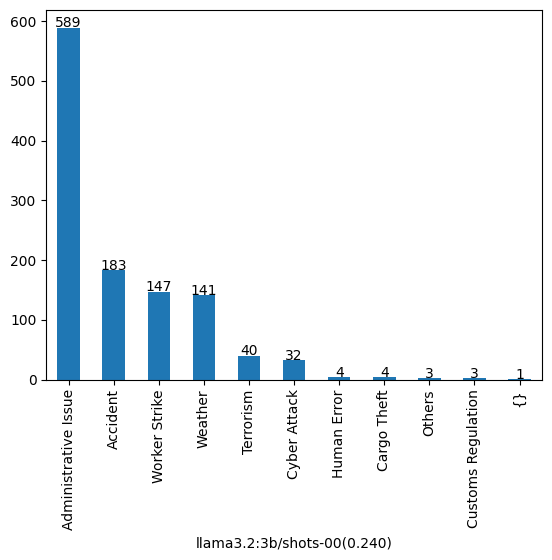

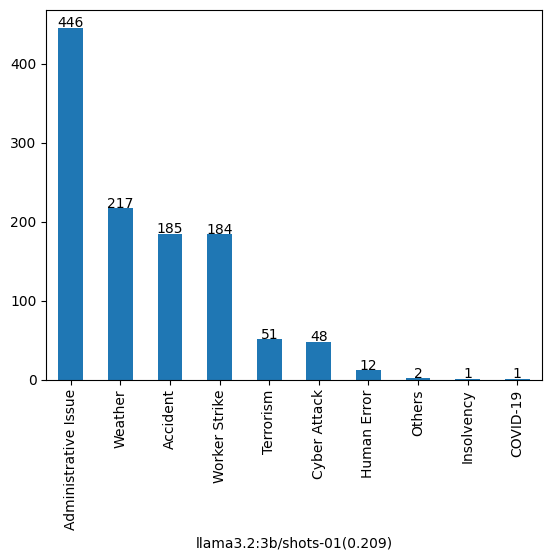

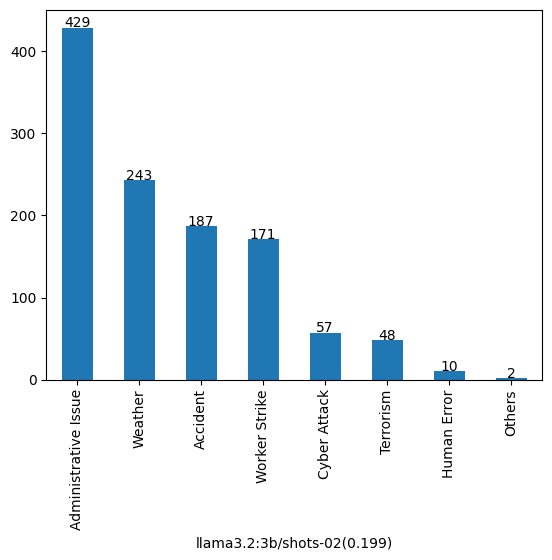

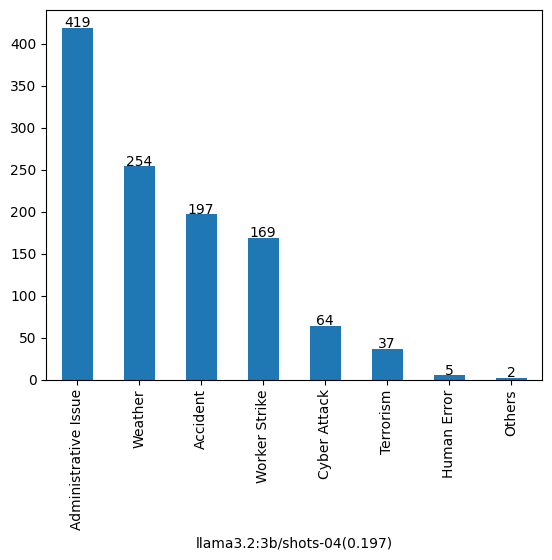

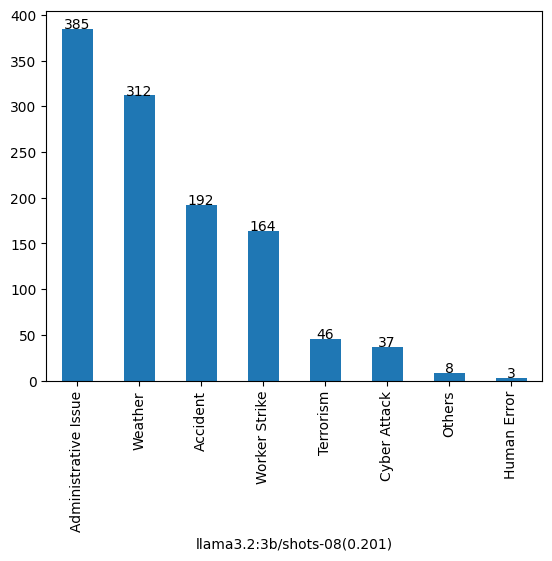

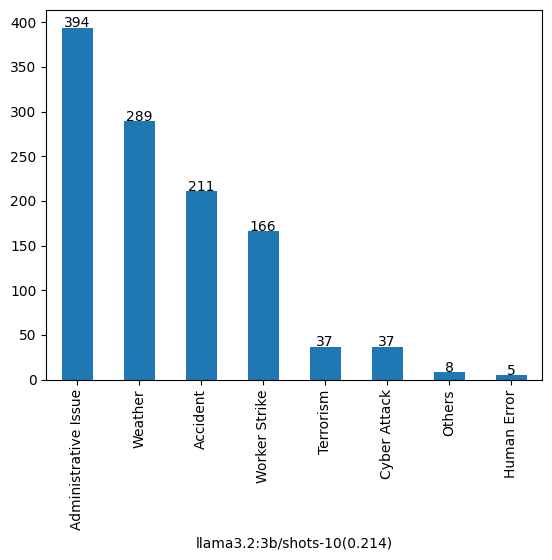

category not in json: {}


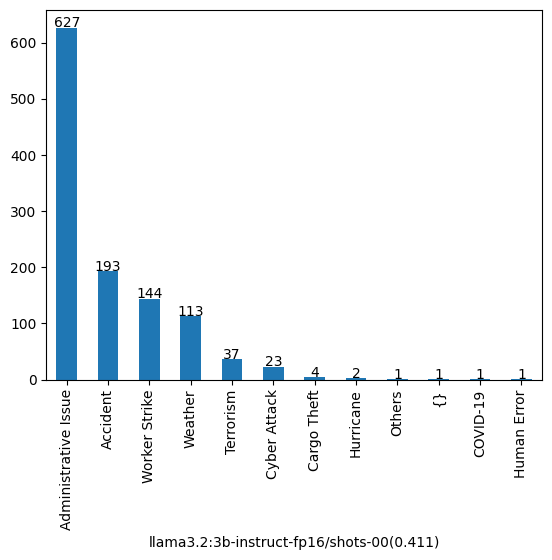

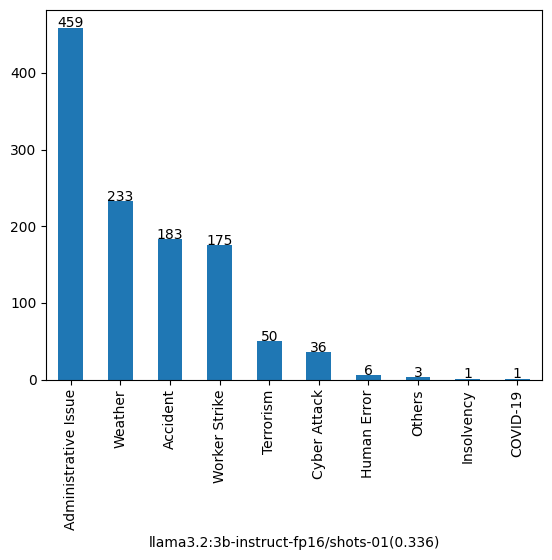

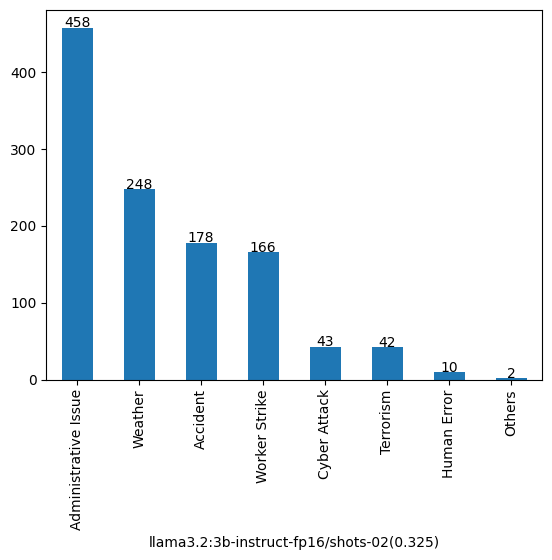

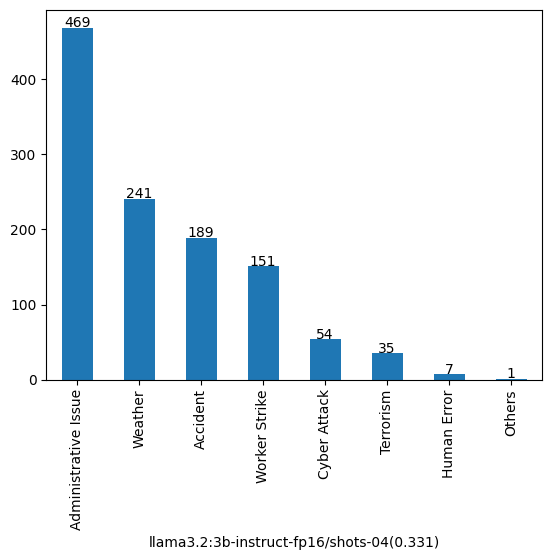

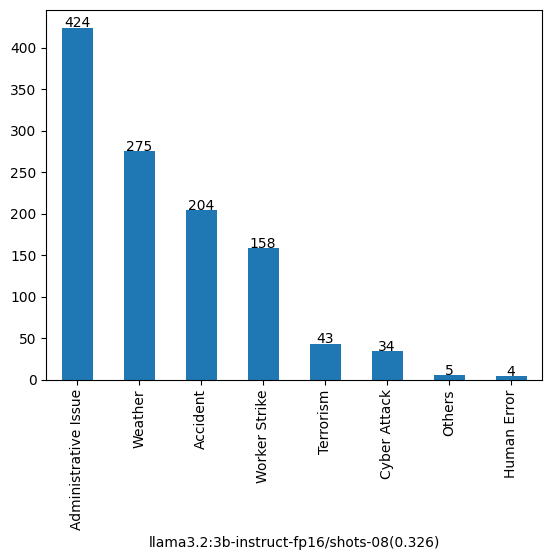

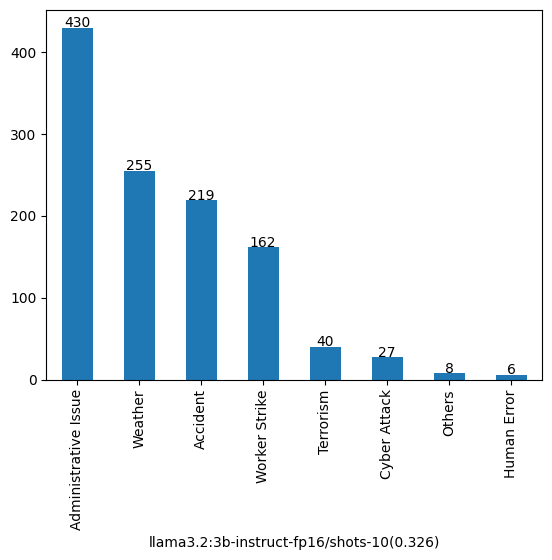

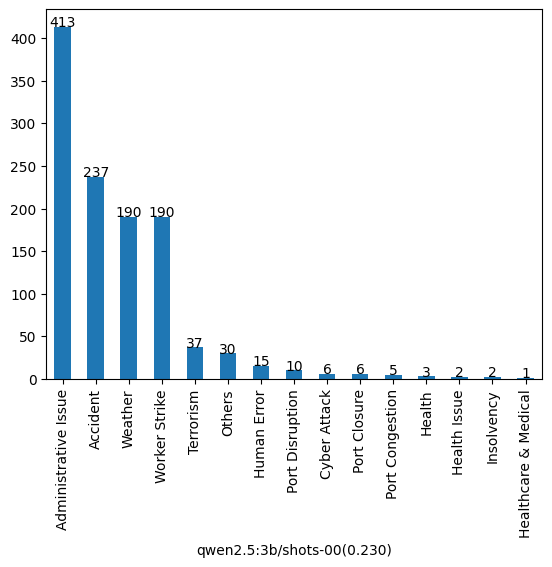

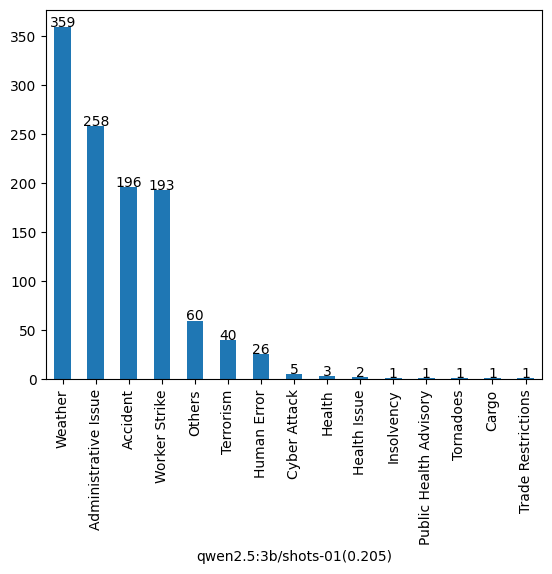

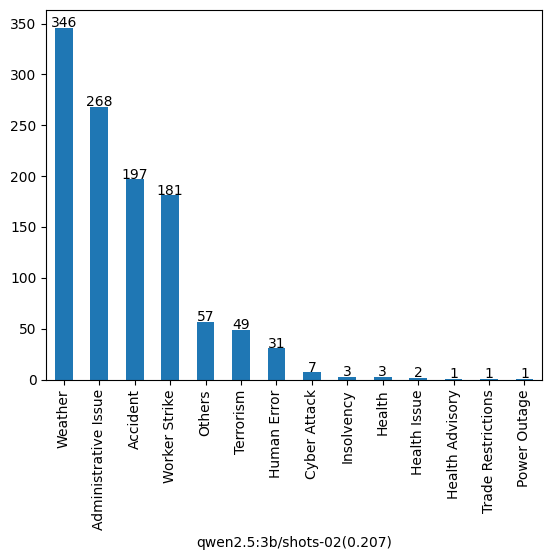

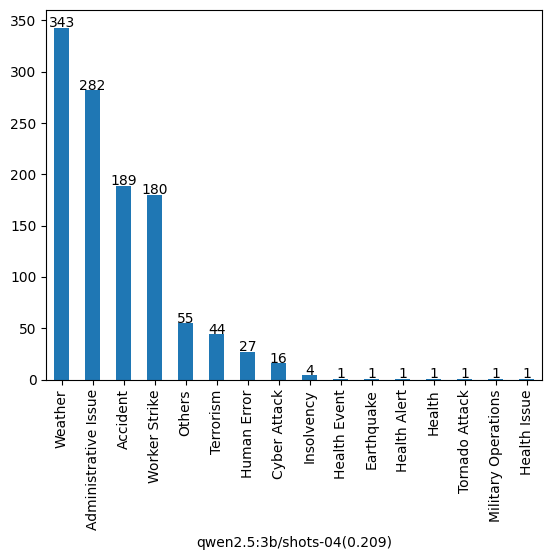

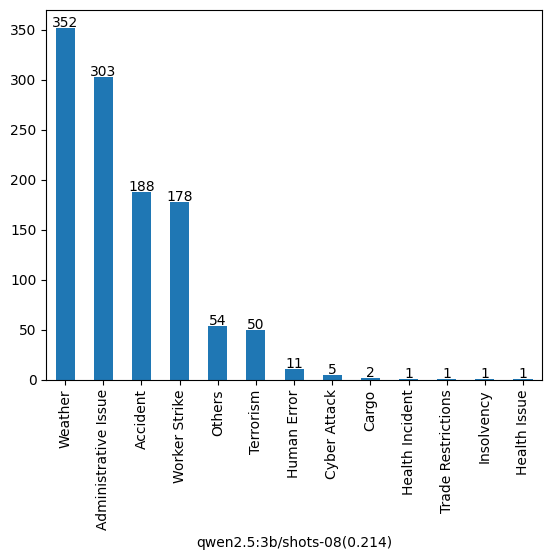

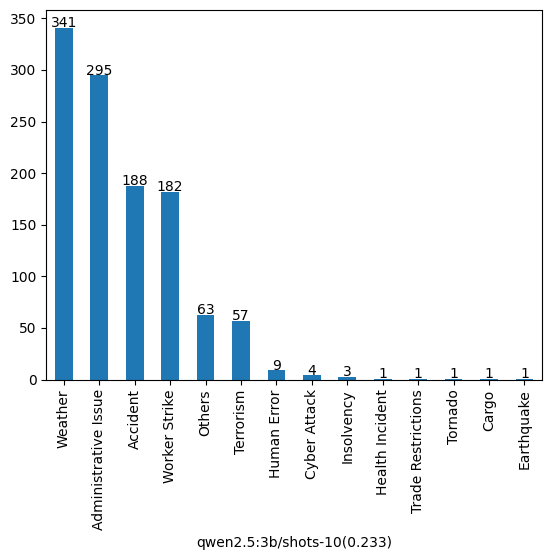

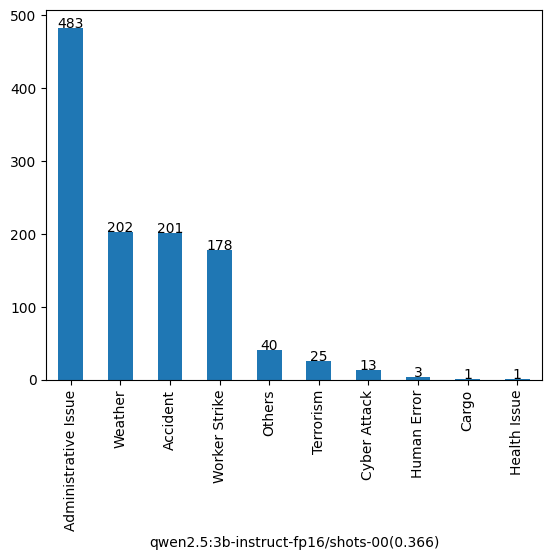

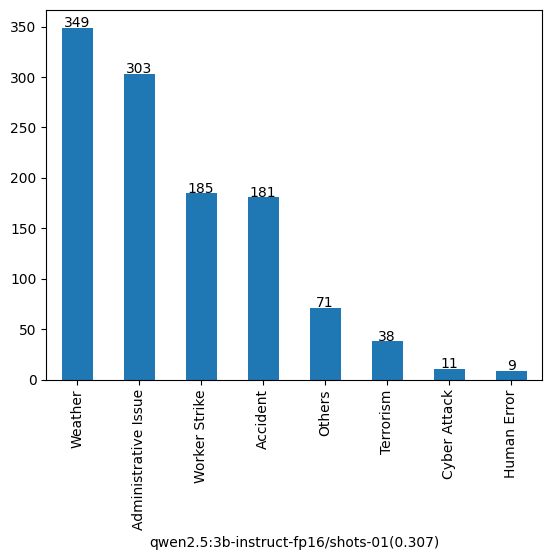

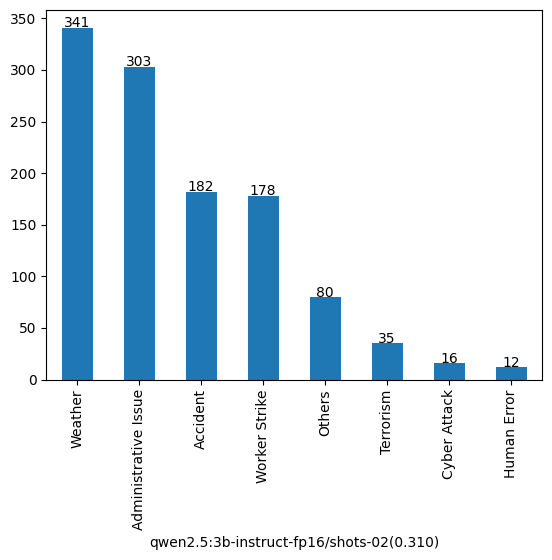

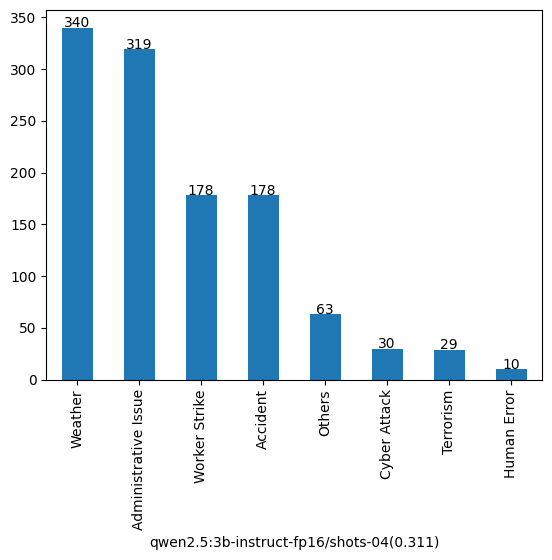

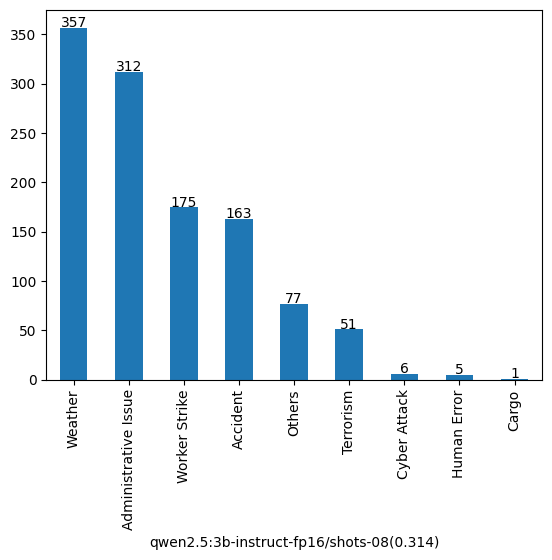

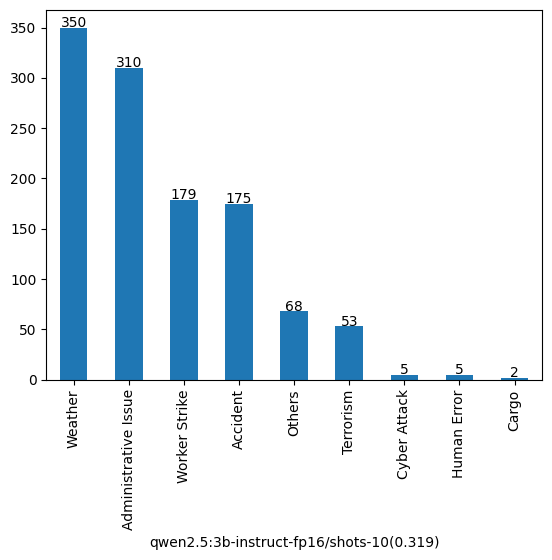

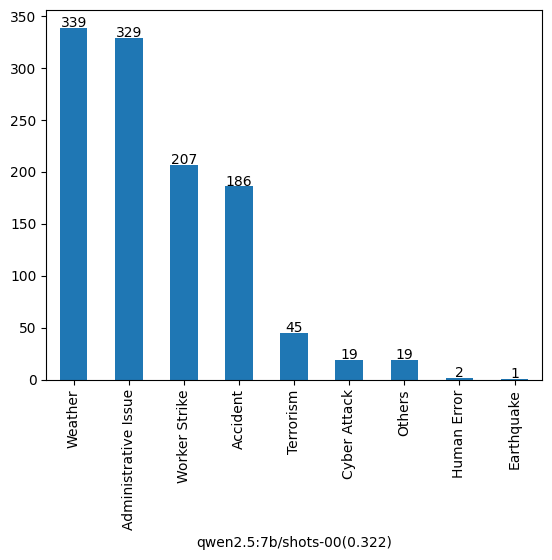

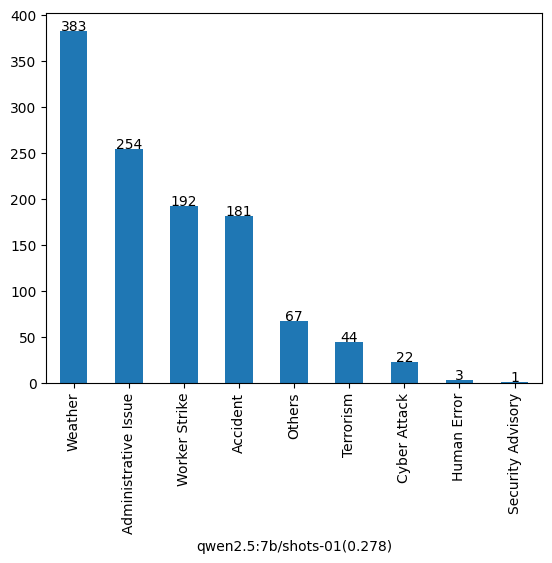

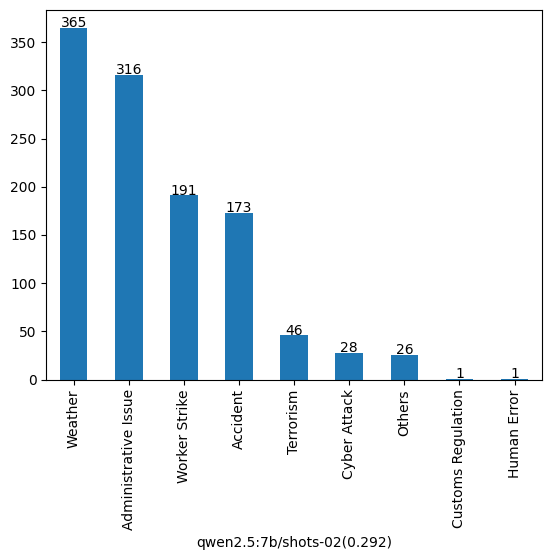

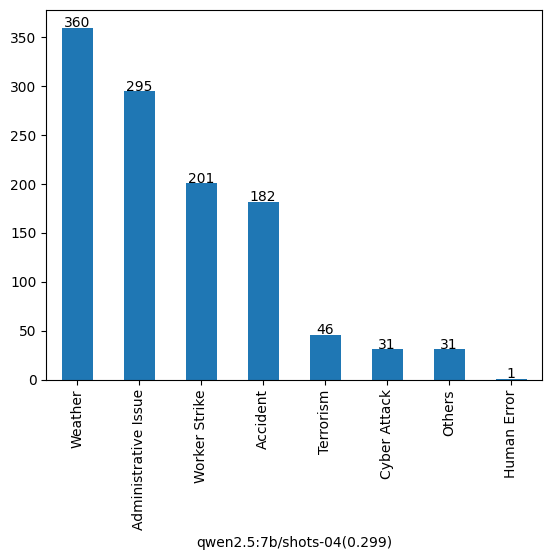

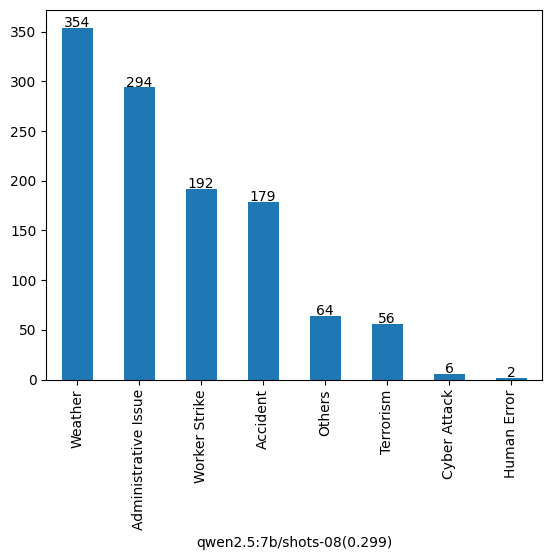

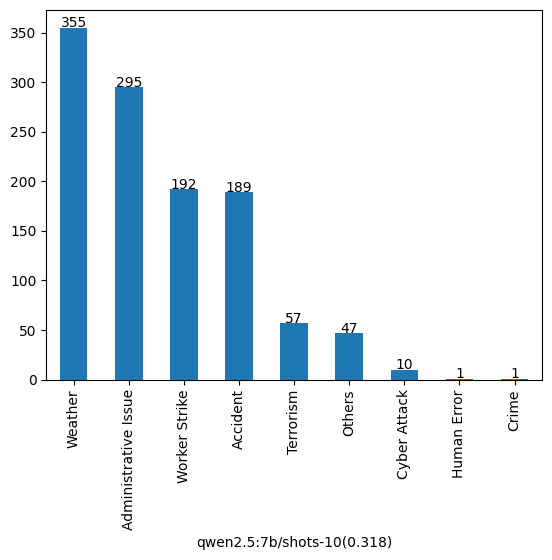

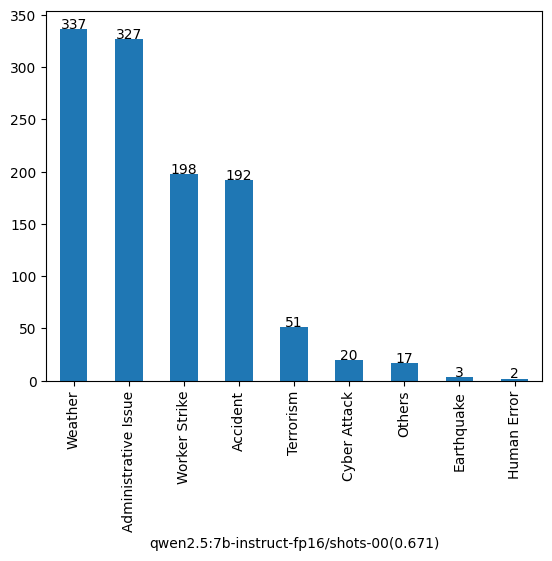

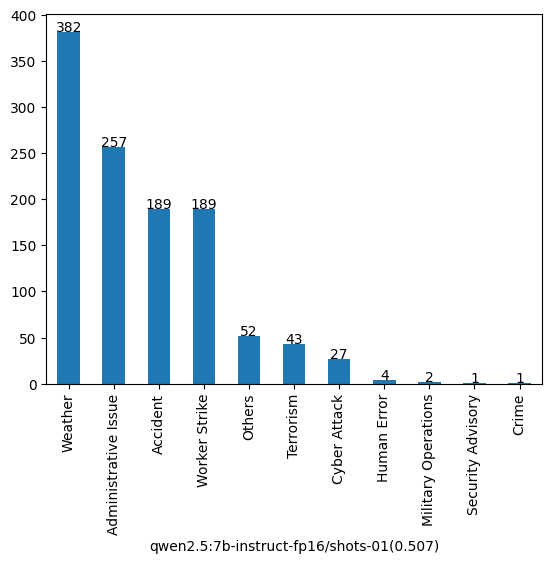

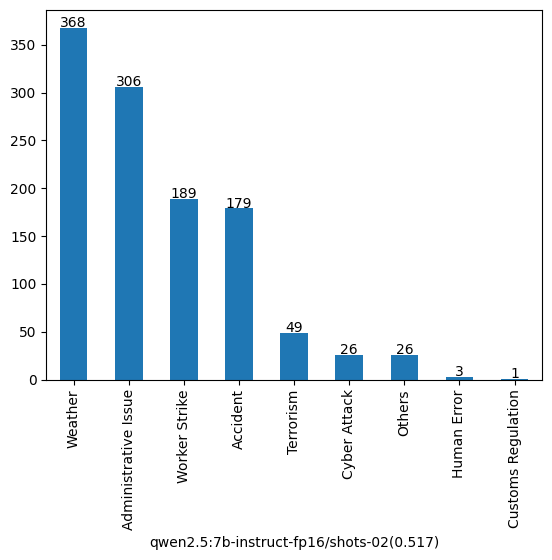

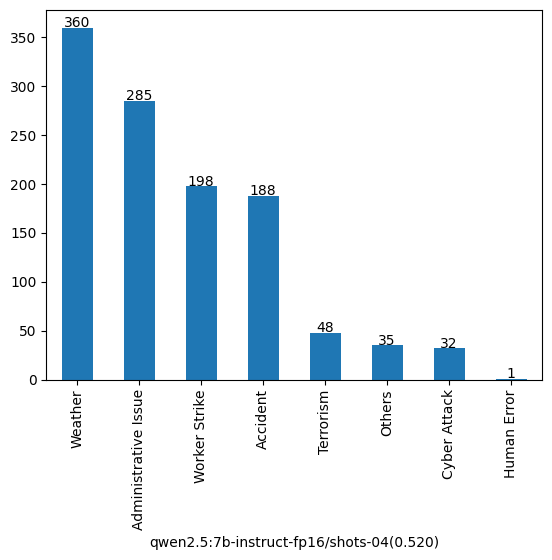

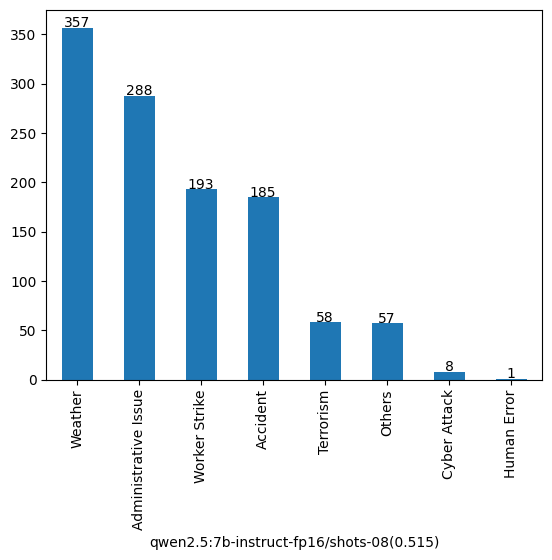

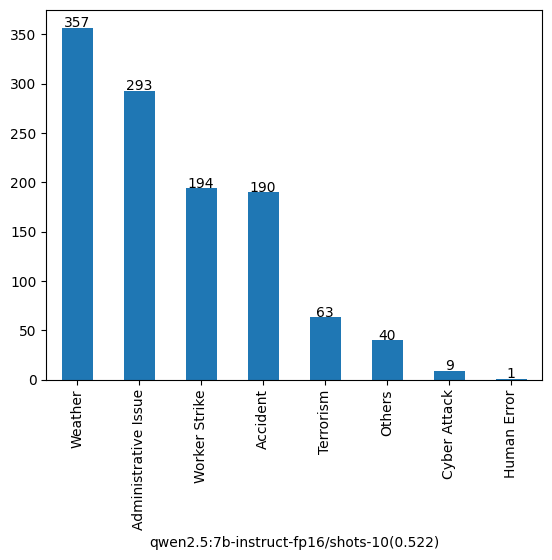

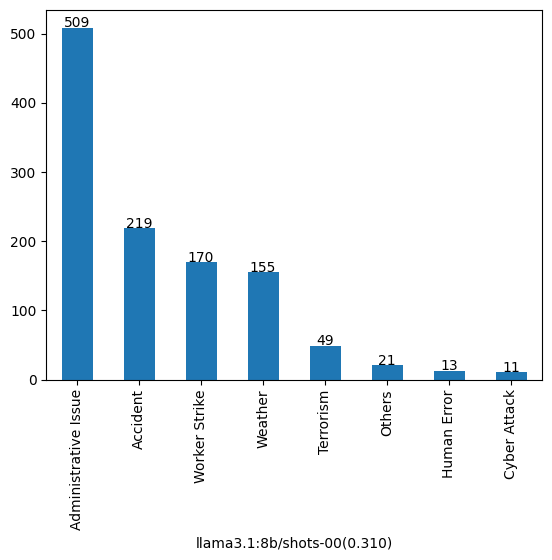

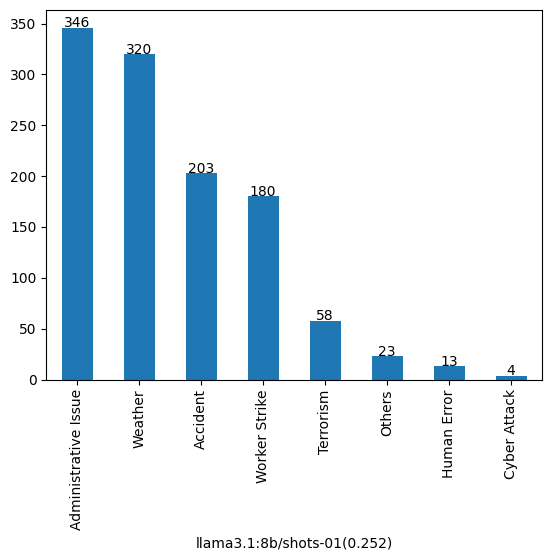

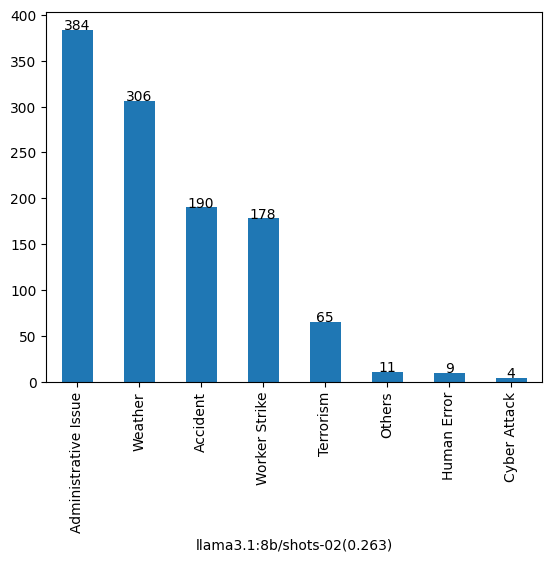

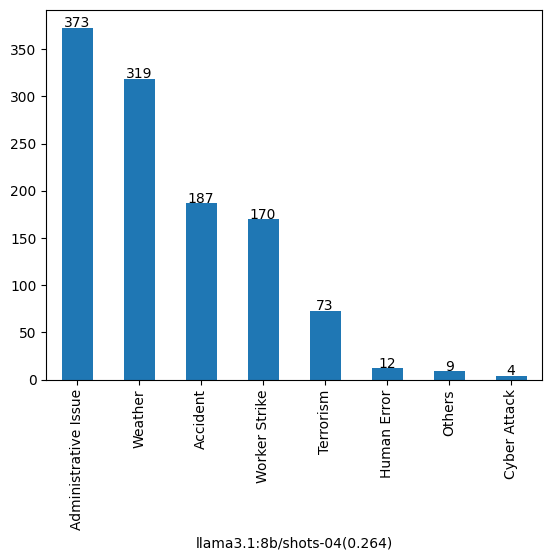

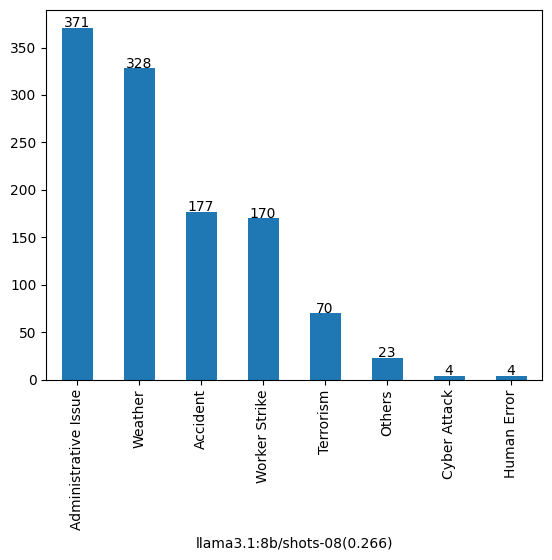

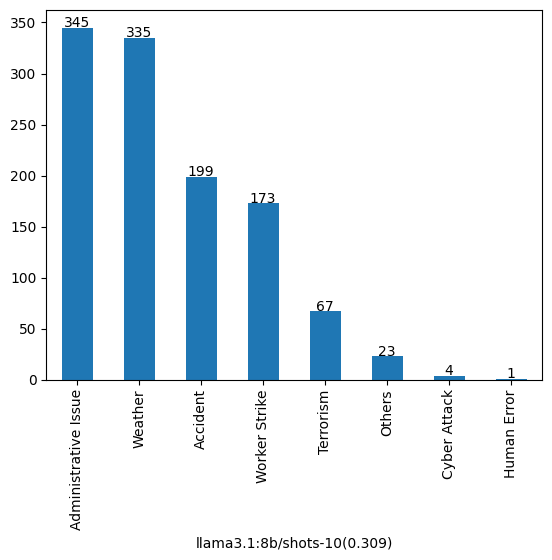

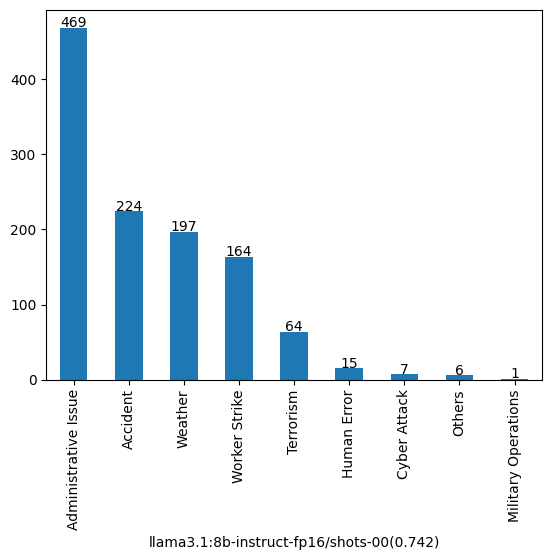

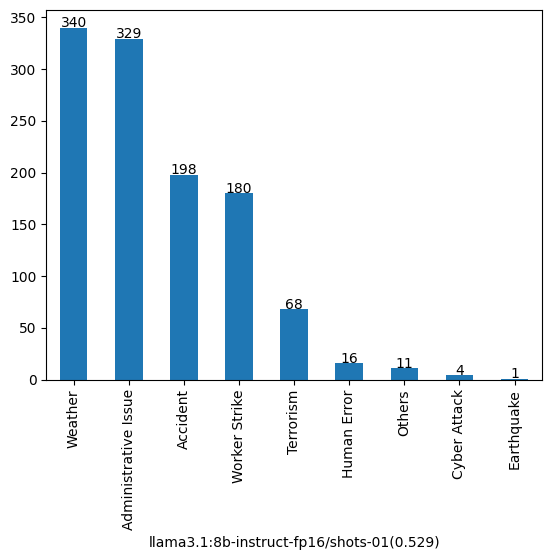

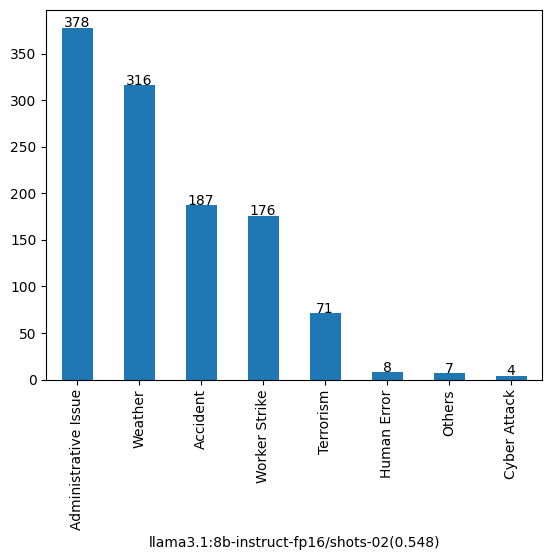

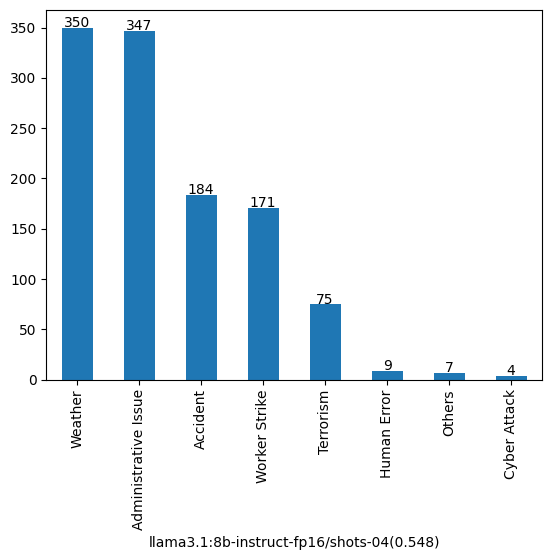

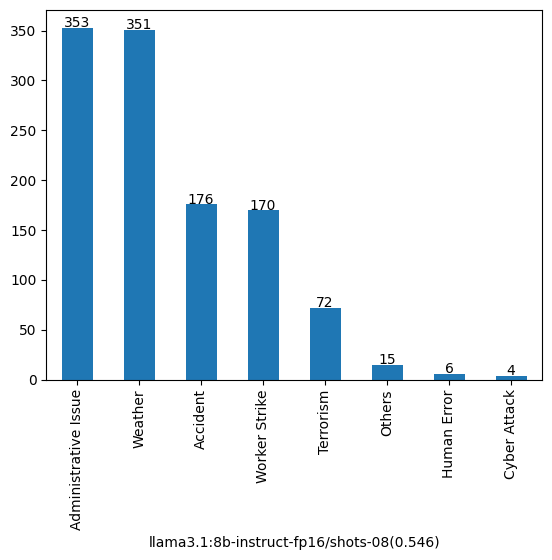

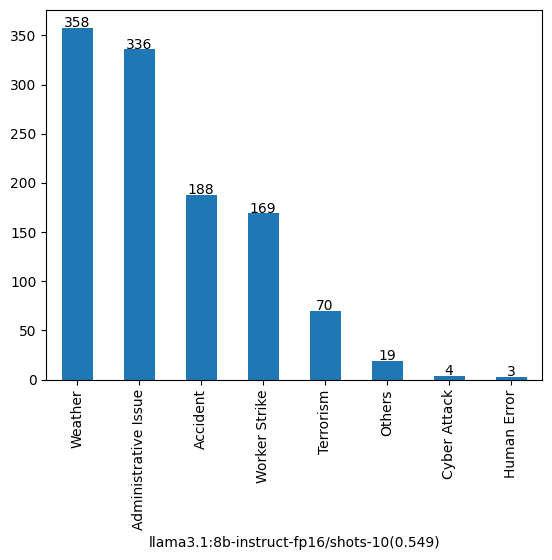

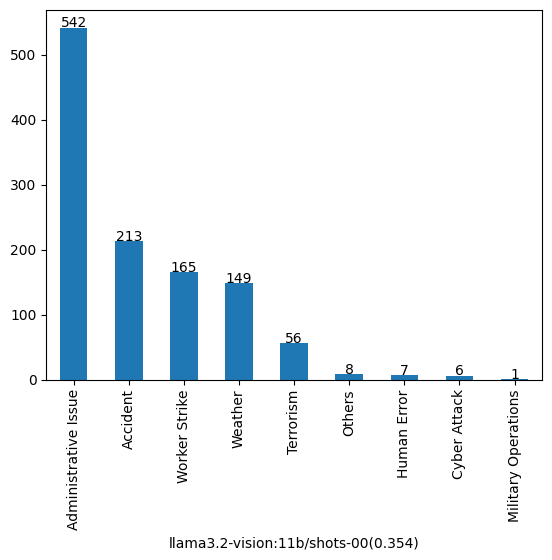

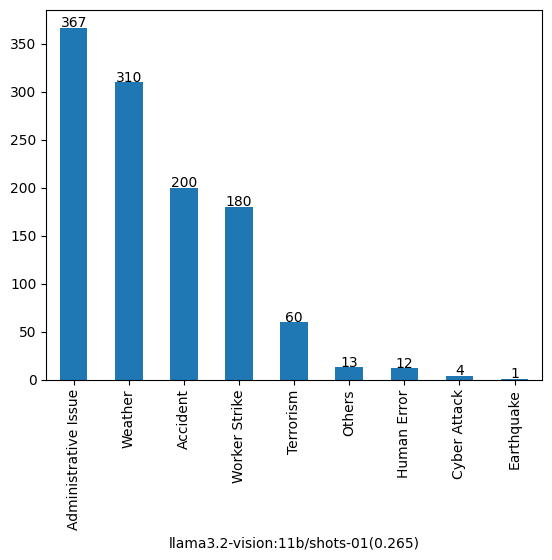

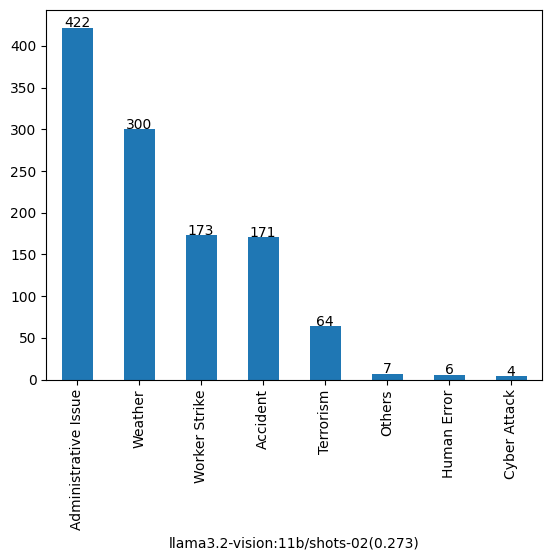

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


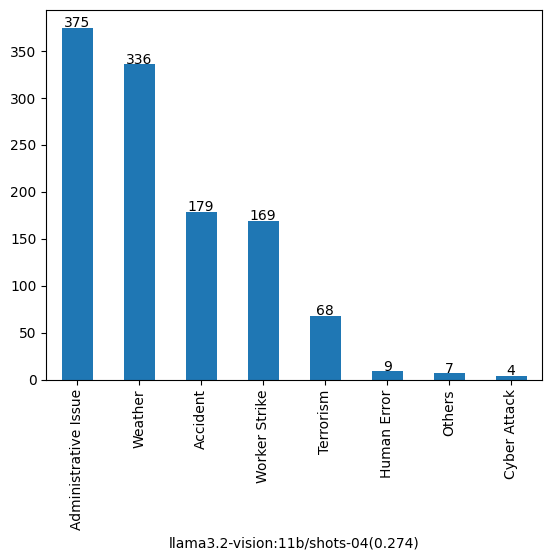

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


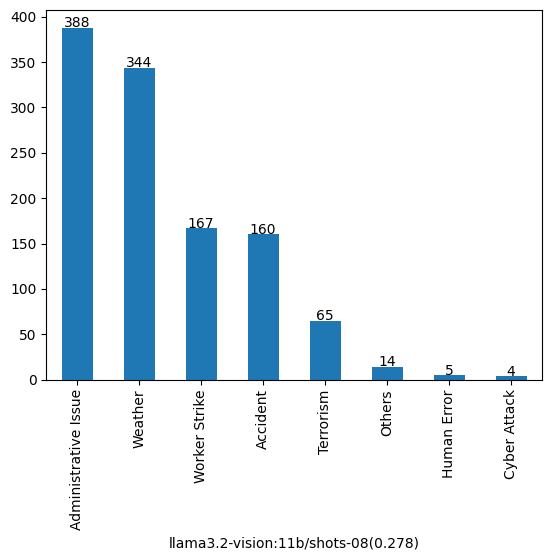

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


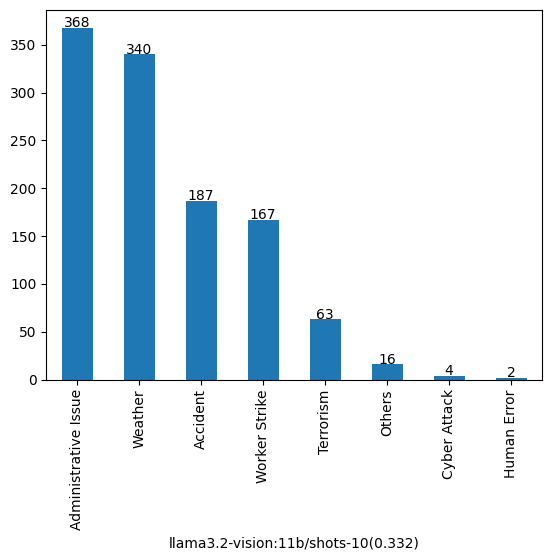

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


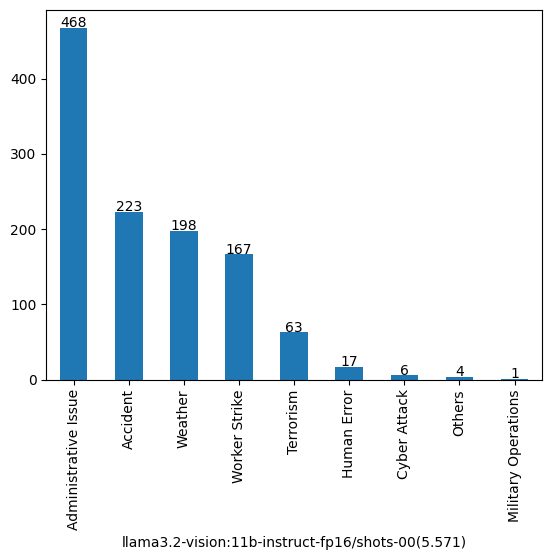

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


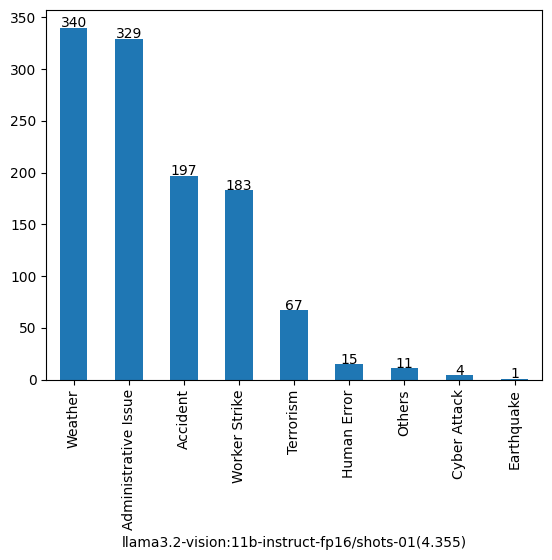

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


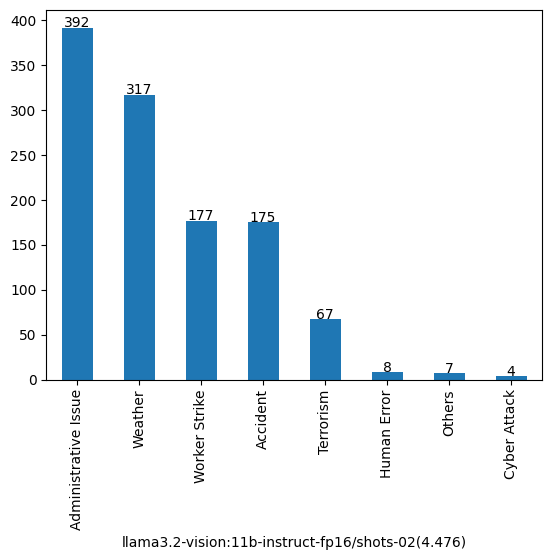

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


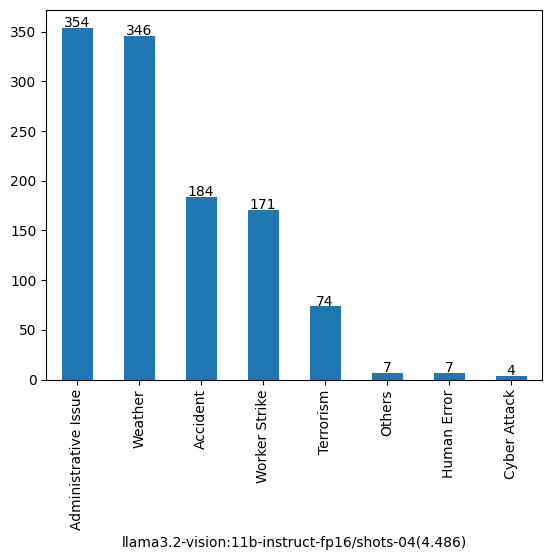

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


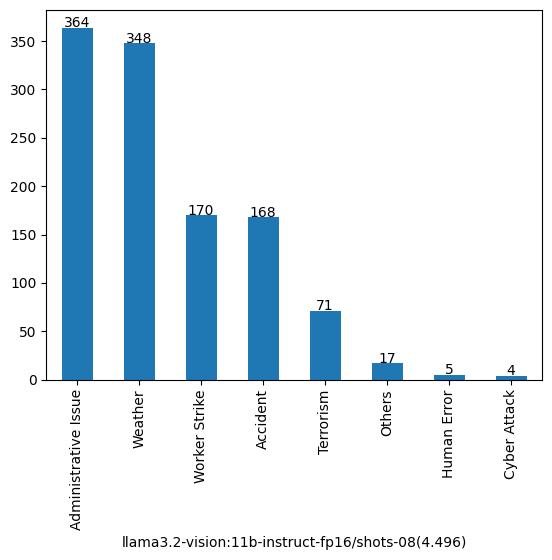

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


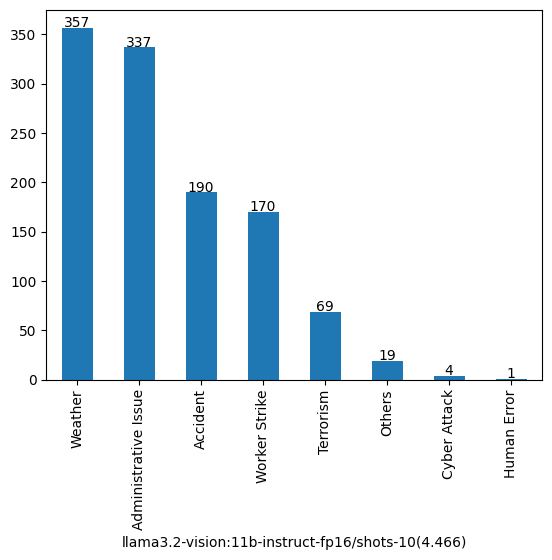

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


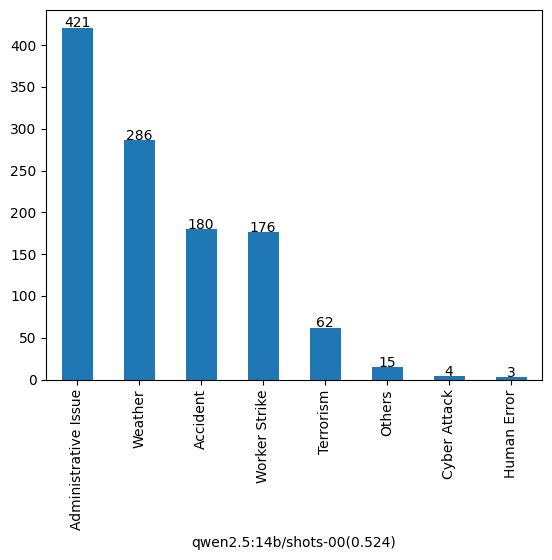

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


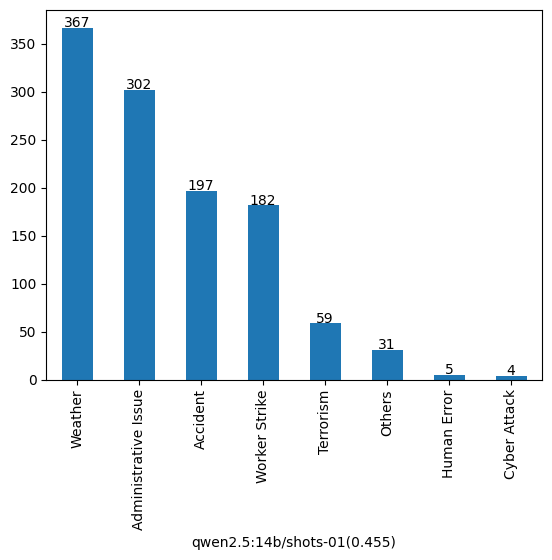

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


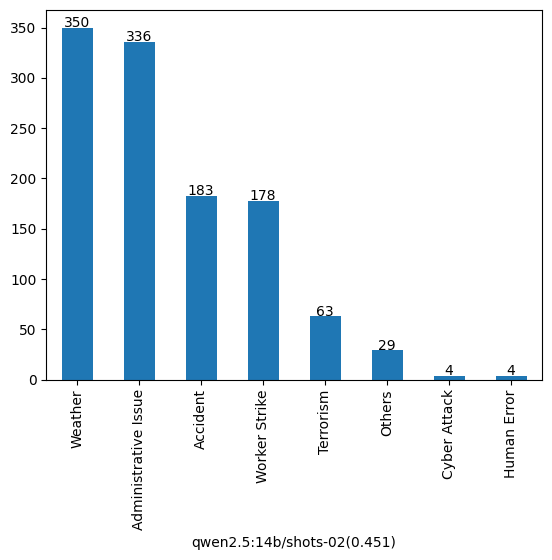

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


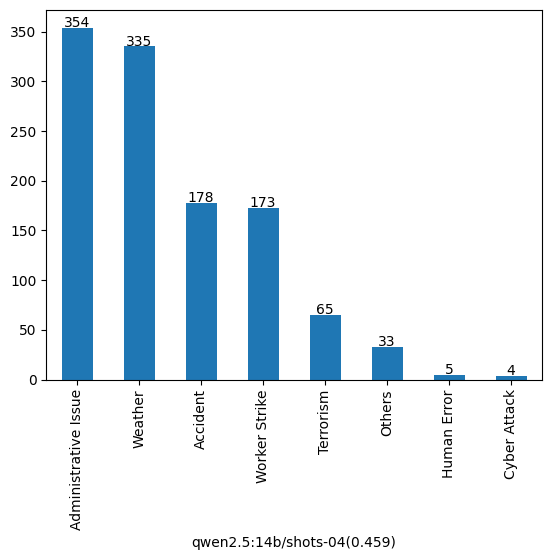

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


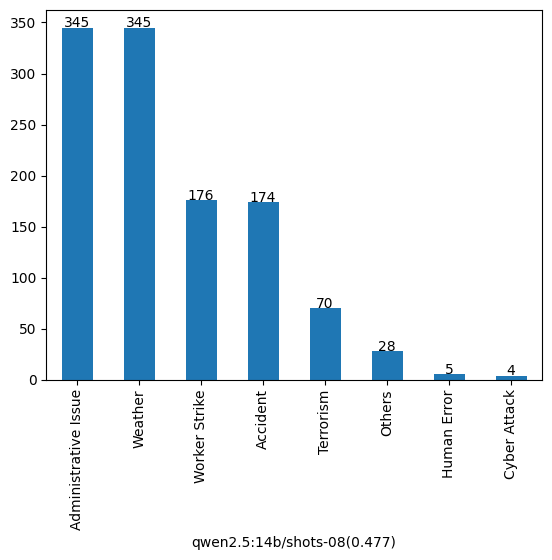

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


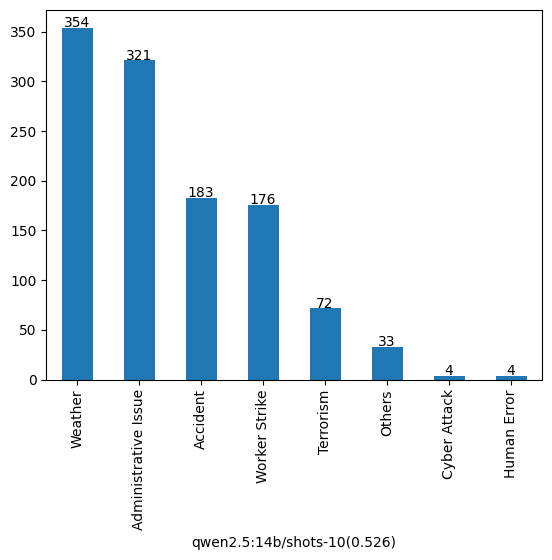

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


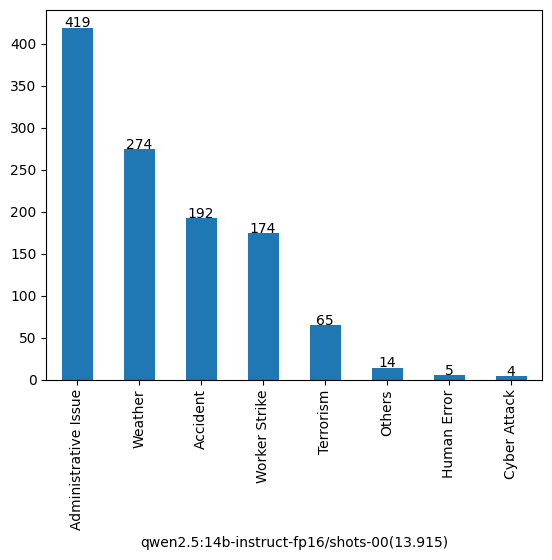

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


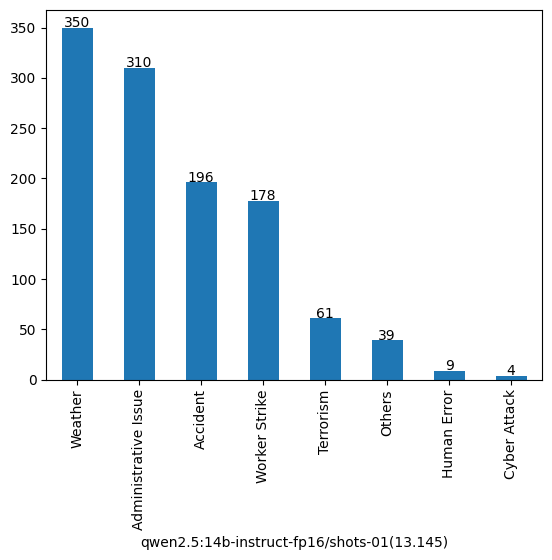

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


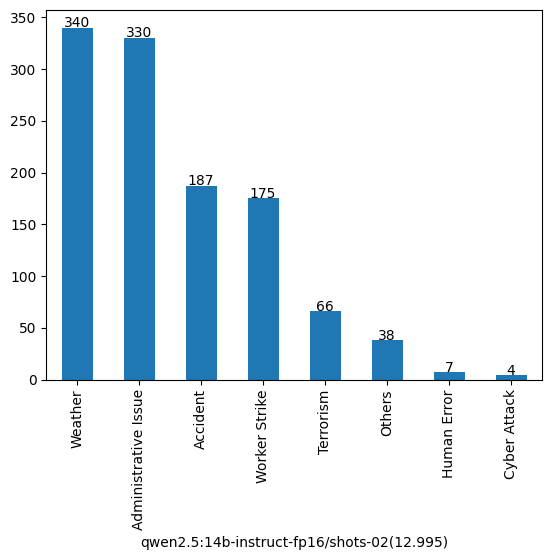

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


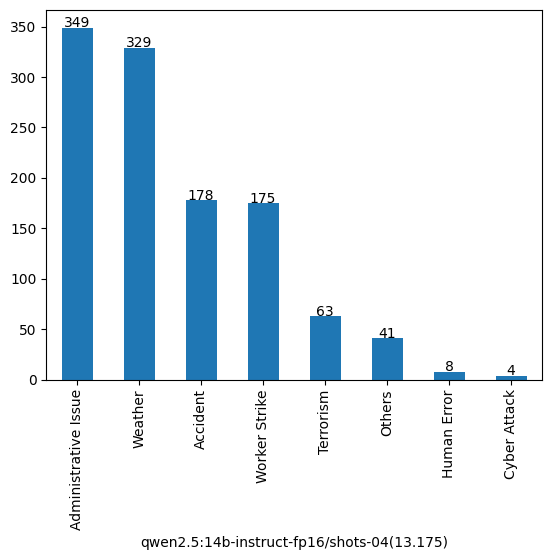

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


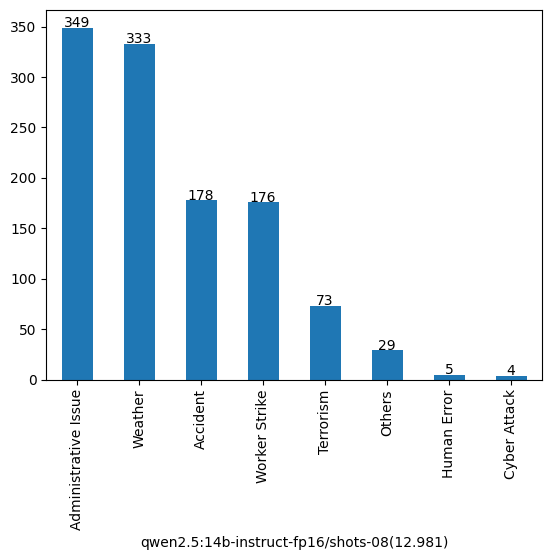

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


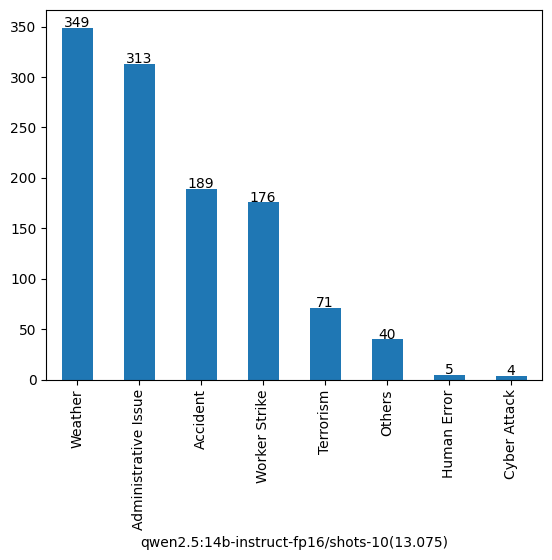

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


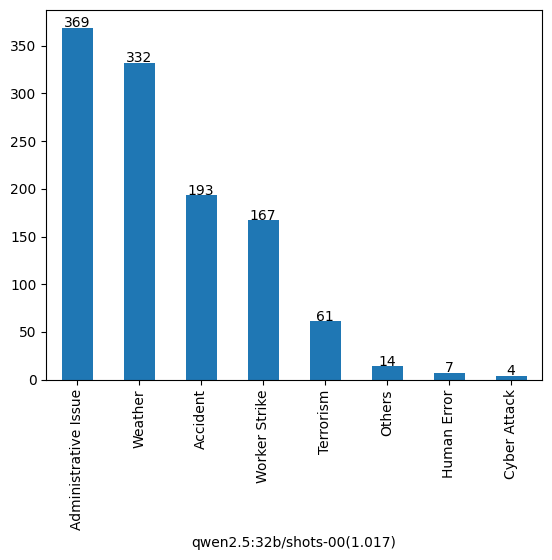

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


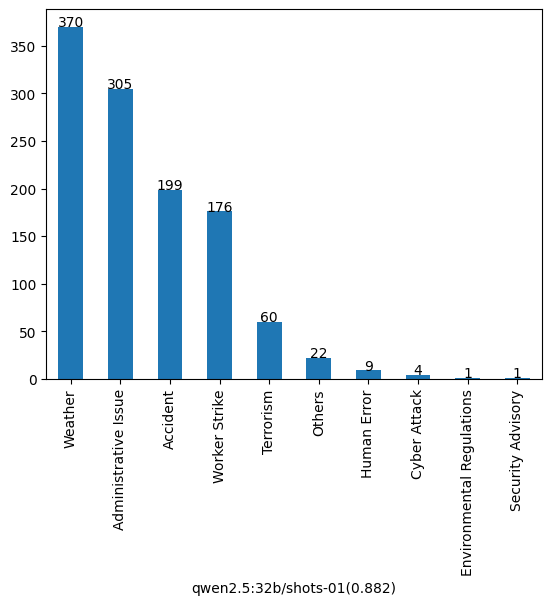

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


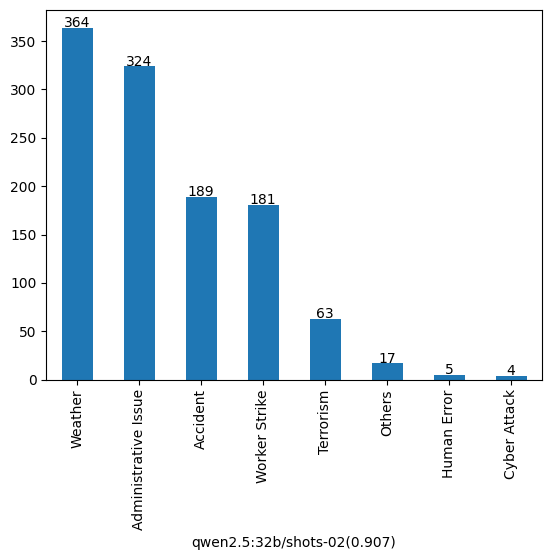

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


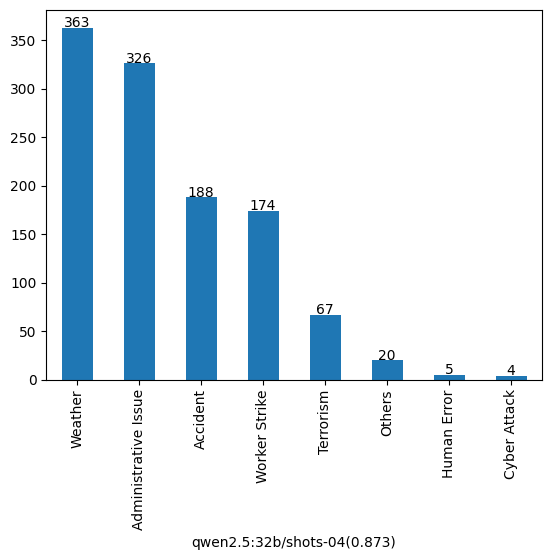

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


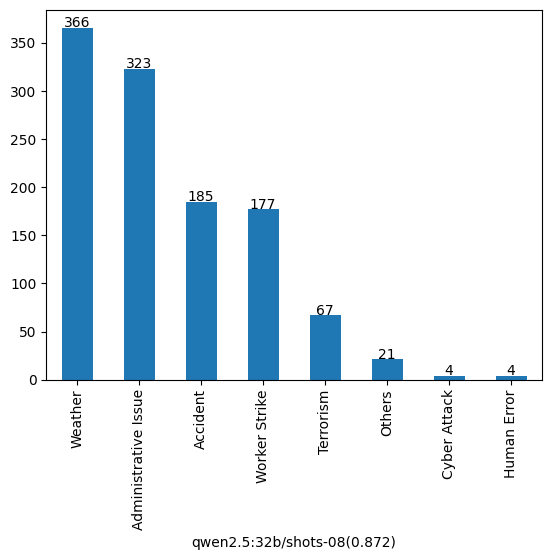

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


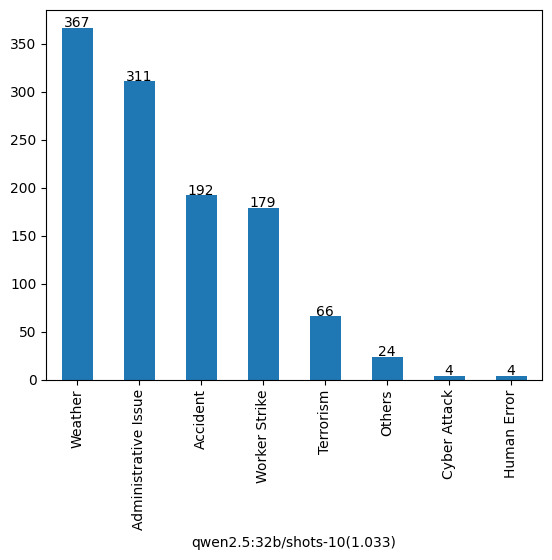

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


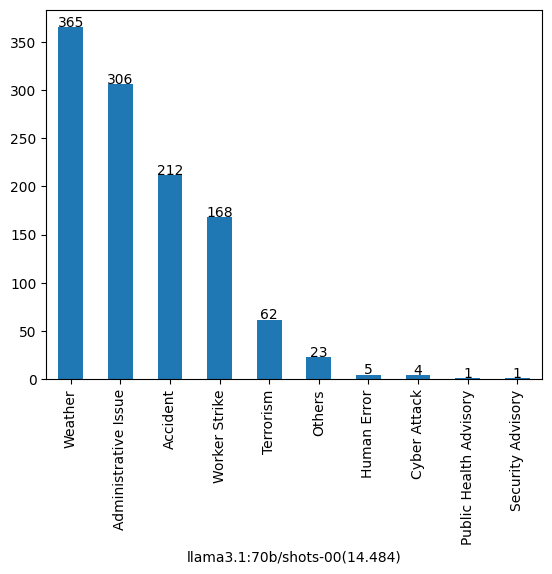

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


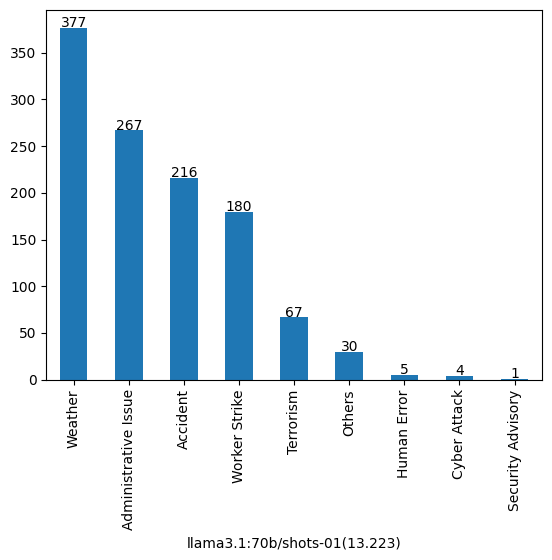

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


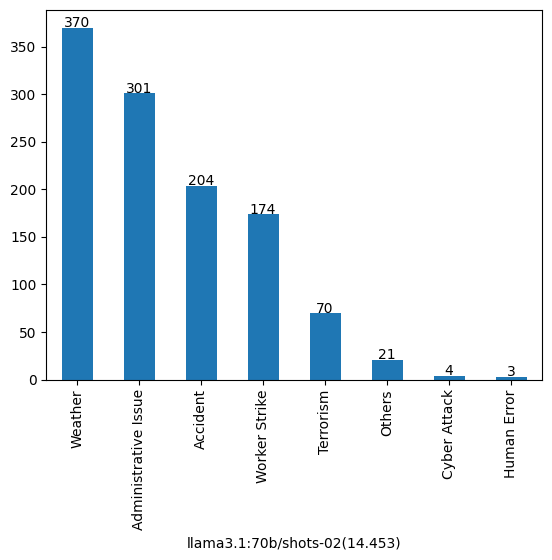

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


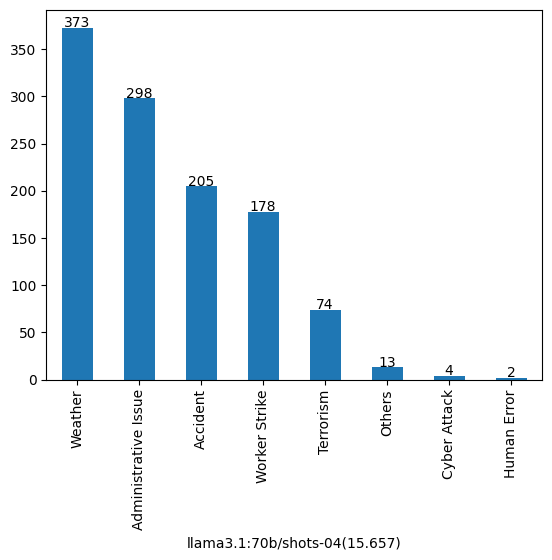

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


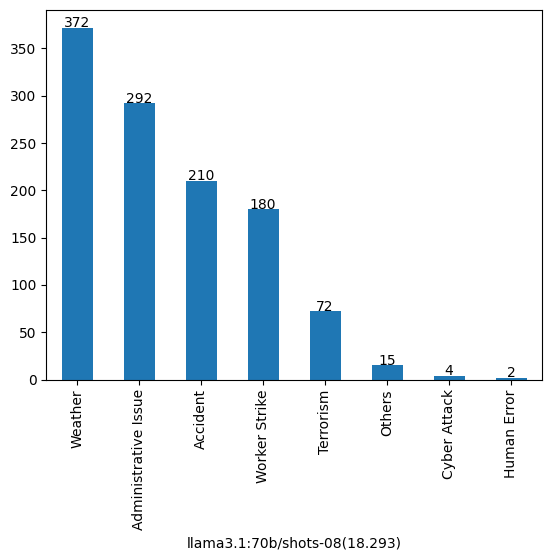

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


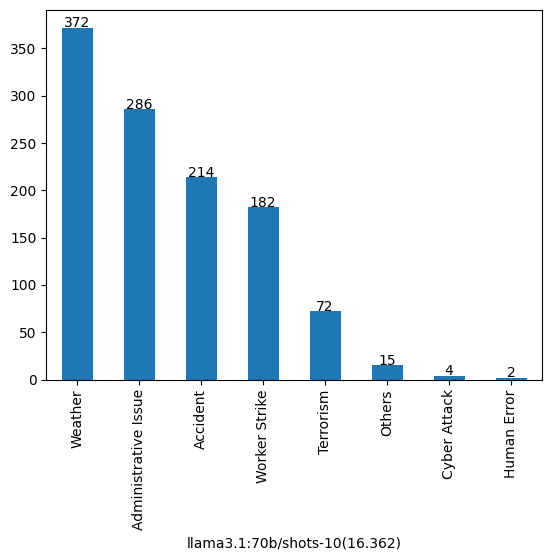

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


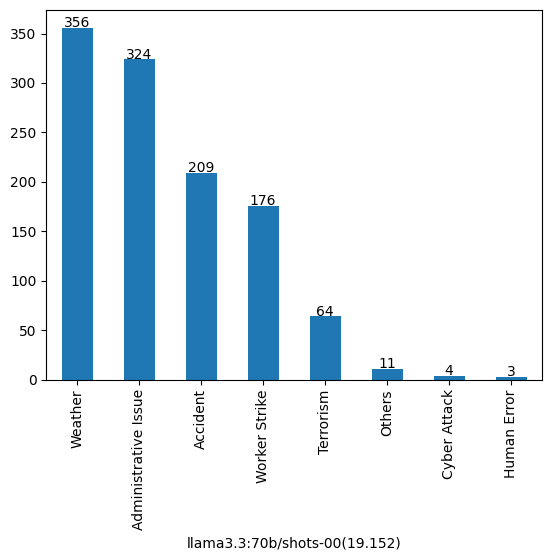

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


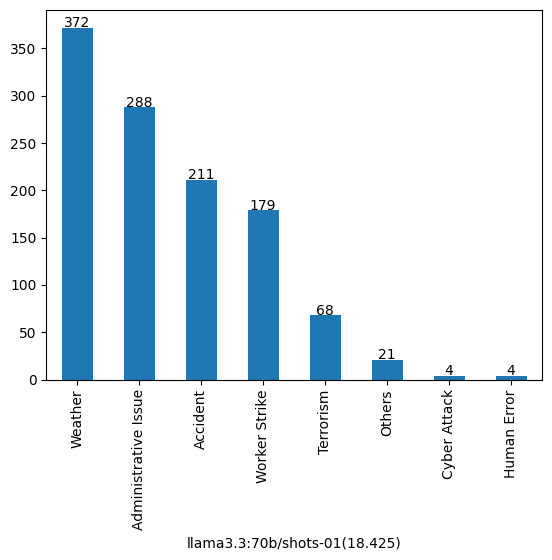

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


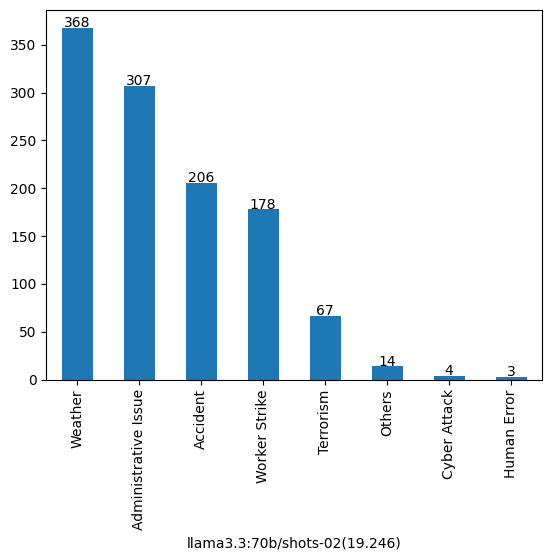

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


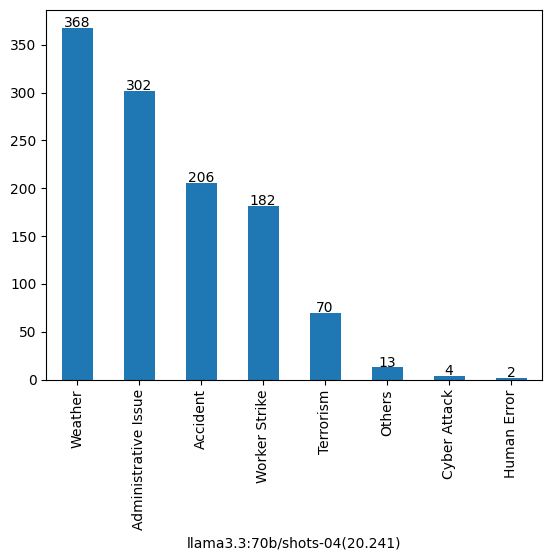

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


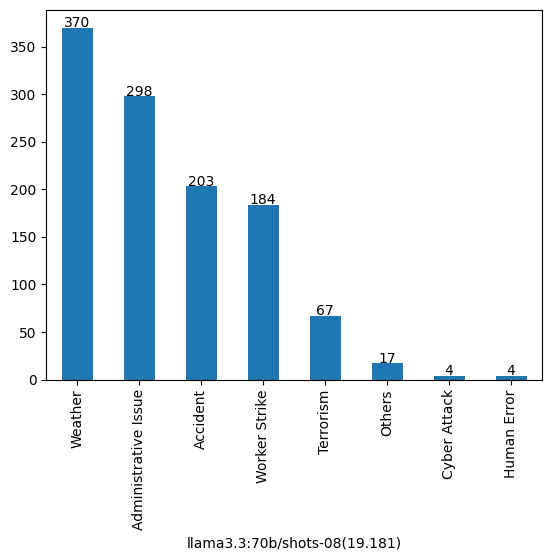

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


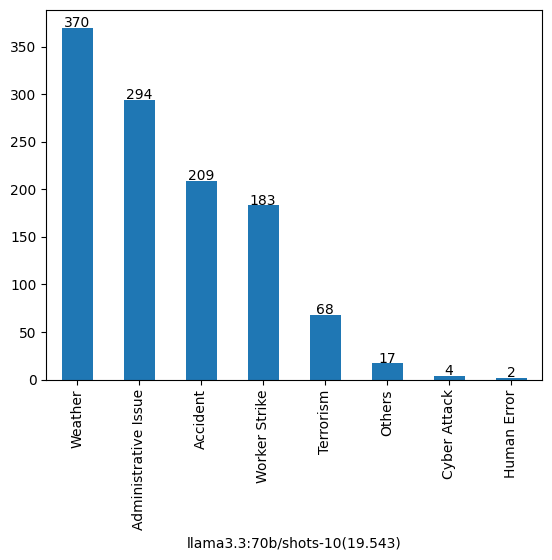

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


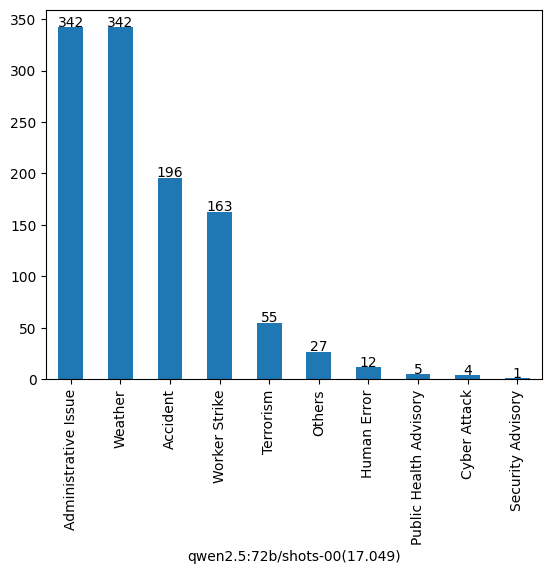

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


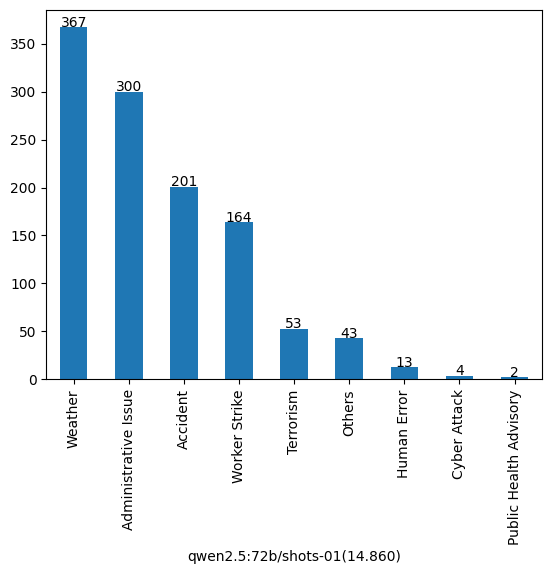

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


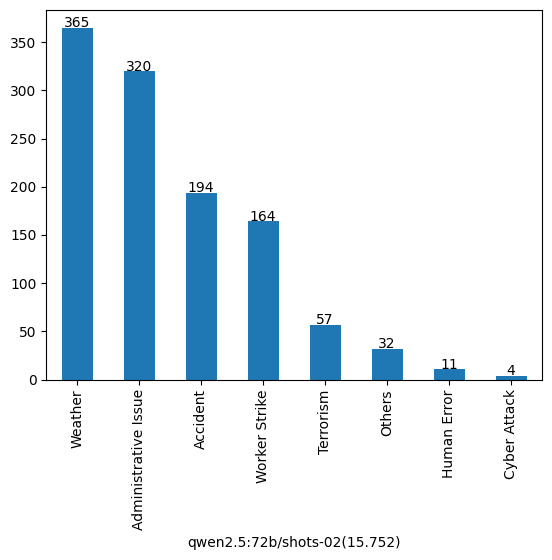

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


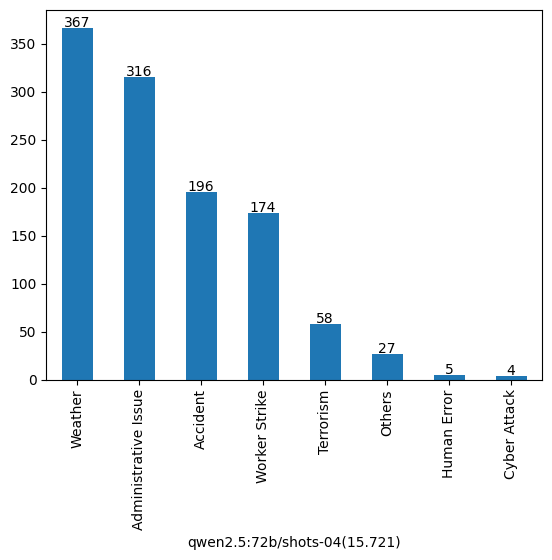

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


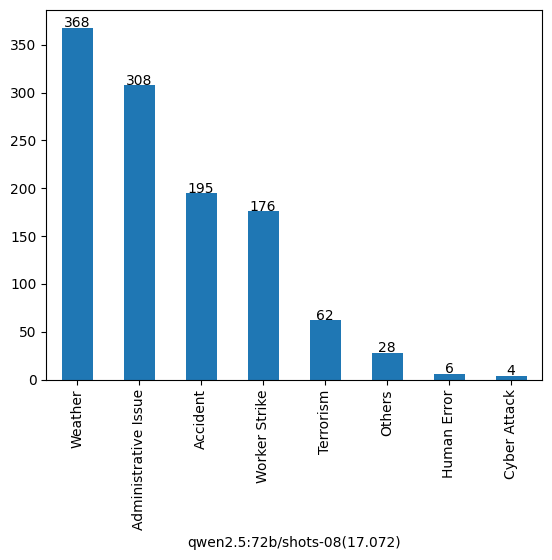

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


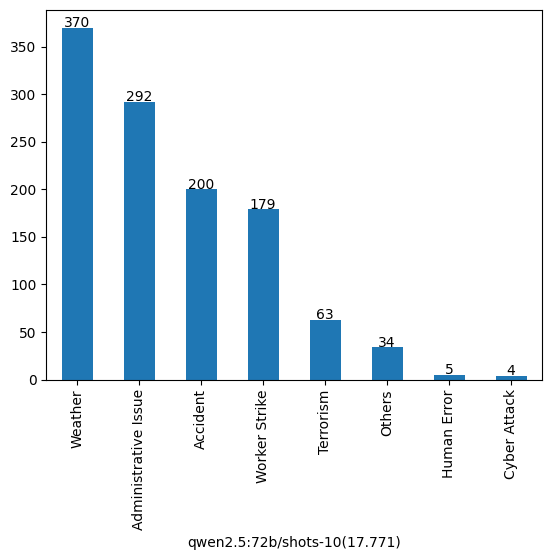

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


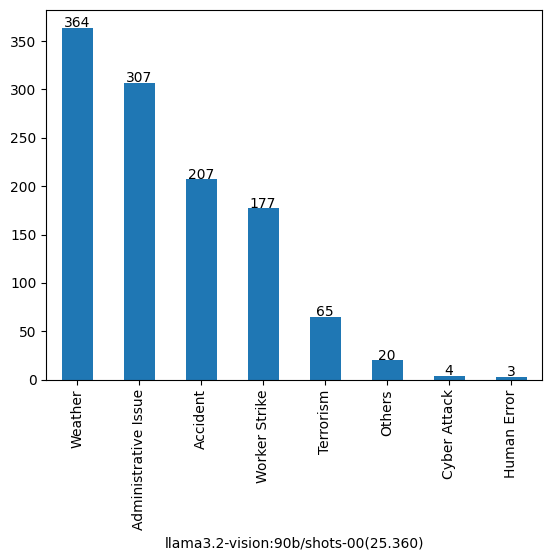

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


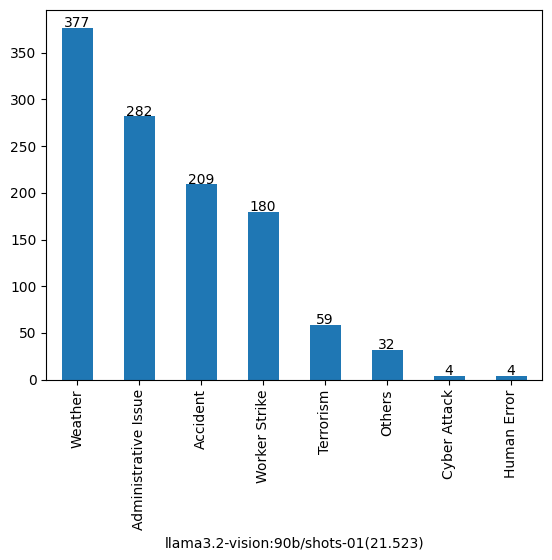

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


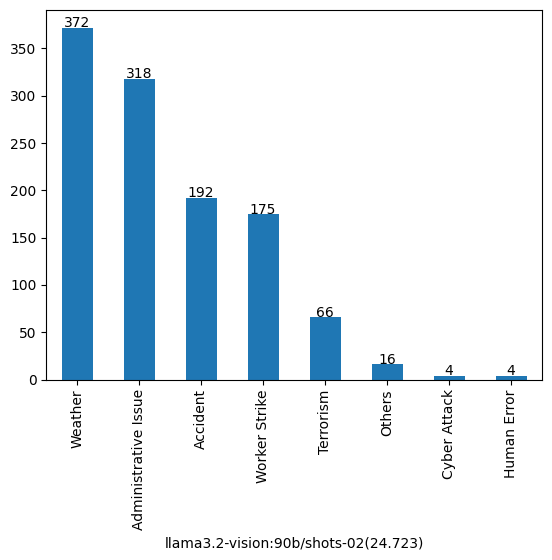

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


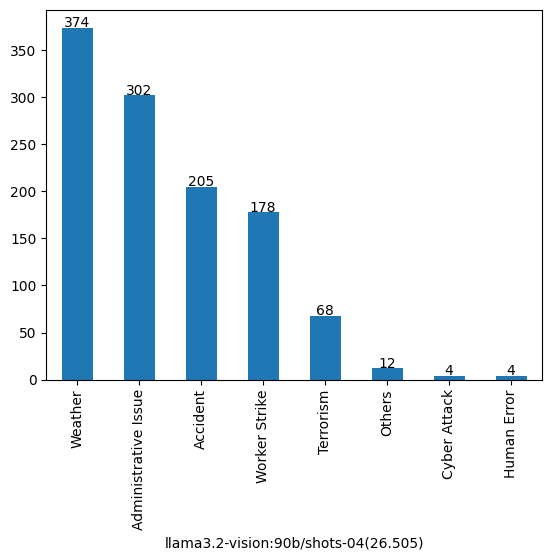

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


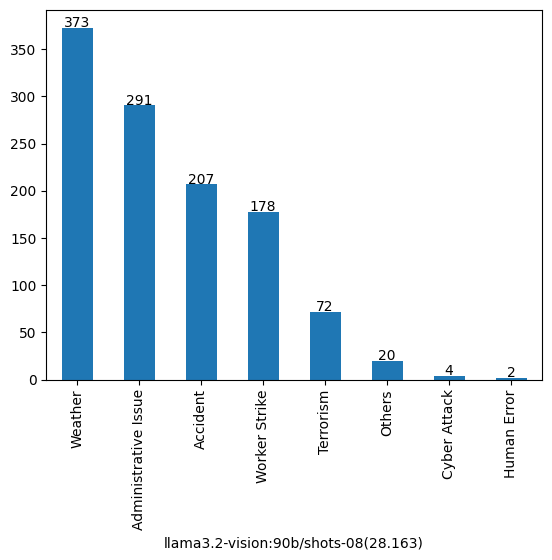

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


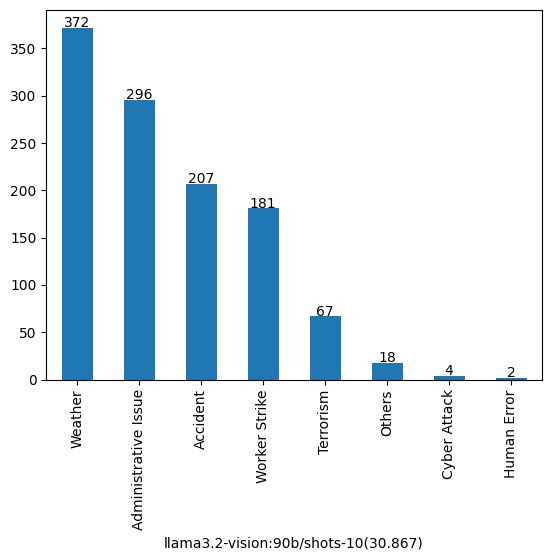

In [49]:
from llm_toolkit.data_utils import plot_bar_chart, extract_answer

for column in result_columns:
    plot_bar_chart(df, column, preprocess_func=extract_answer)